# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:20px;">**Credit Card Customer Segmentation**</p>

<p align="center">
  <img src="https://www.patriotsoftware.com/wp-content/uploads/2017/10/accepting-credit-card-payments.jpg" alt="Credit Card" width="600">
  <br>
  Source : Patriotsoftware.com
</p>

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:8px;">**Introduction**</p>

**Author : Salsa Sabitha Hurriyah**
  
**Objective :**  
Clustering model for customer segmentation of a credit card data of a bank.  
  
**Data Overview :**  
This data contains information on credit card usage for the last 6 months. Dataset was obtained from Bigquery Public Data.

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:8px;">**SQL Query**</p>

``` python
# Query data from
import pandas as pd
df = client.query('''

SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_014_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0 

''').to_dataframe()

# Save into CSV
from google.colab import files
df.to_csv('Dataset.csv', index=False) 
files.download('Dataset.csv')
```

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Import Libraries**</p>

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np
from scipy.stats import skew, pearsonr, kendalltau, spearmanr, uniform, randint

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Machine Learning Modeling
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples

# For Saving Model
import pickle
import json

# For Deactivate Warning
import warnings
warnings.filterwarnings('ignore')

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Data Loading**</p>

In [2]:
# Read csv into data frame
dataset = pd.read_csv('Dataset.csv')

In [3]:
# Create a new variable to store a copy of the data frame
df = dataset.copy()

In [4]:
# Check data shape
df.shape

(4475, 18)

In [5]:
# Display the first 10 and last 10 data of the data frame
print('First 10 Data :')
display(df.head(10))
print('Last 10 Data :')
display(df.tail(10))

First 10 Data :


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

Last 10 Data :


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

**Explanation :**  

Load data successfully

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Exploratory Data Analysis (EDA)**</p>

## **- Summary Data**

In [6]:
# Display summary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

**Explanation :**  
- The dataset consists of 18 columns and 4475 rows.
- The data type consists of 14 float columns and 4 integer columns.
- There are missing values in MINIMUM_PAYMENTS and CREDIT_LIMIT columns.

## **- Missing Value Check**

<Axes: >

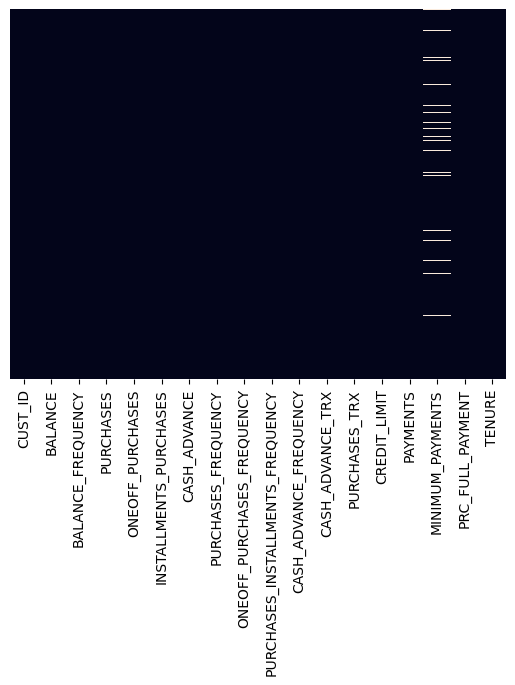

In [7]:
# Missing Value Visualization
sns.heatmap(df.isna(),yticklabels=False ,cbar=False)

**Explanation :**  

There are missing values in MINIMUM_PAYMENTS column.

In [8]:
# Display missing values in each column
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    158
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

**Explanation :**  

There are 158 missing values in MINIMUM_PAYMENTS column and 1 missing value in CREDIT_LIMIT column.

## **- Duplicate Data Check**

In [9]:
# Data duplikat check
df.duplicated().sum()

0

**Explanation :**  

There are no duplicate data

## **- Central Tendency Data Check**

In [10]:
# Descriptive Statistics Check
df.describe().T

count         mean          std  \
CUST_ID                           4475.0  4476.000000  2583.931114   
BALANCE                           4475.0  1565.743939  2091.205727   
BALANCE_FREQUENCY                 4475.0     0.877608     0.235604   
PURCHASES                         4475.0  1003.158324  2210.812899   
ONEOFF_PURCHASES                  4475.0   588.504849  1666.500287   
INSTALLMENTS_PURCHASES            4475.0   415.025075   927.360842   
CASH_ADVANCE                      4475.0   973.453671  2133.464502   
PURCHASES_FREQUENCY               4475.0     0.490122     0.399874   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202614     0.298502   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.364989     0.397336   
CASH_ADVANCE_FREQUENCY            4475.0     0.134156     0.199221   
CASH_ADVANCE_TRX                  4475.0     3.196425     6.500169   
PURCHASES_TRX                     4475.0    14.490503    24.156038   
CREDIT_LIMIT                      4474.0  4494.020175  3668.535689   
PAYMENTS                          4475.0  1726.212274  2961.258570   
MINIMUM_PAYMENTS                  4317.0   854.429538  2306.411178   
PRC_FULL_PAYMENT                  4475.0     0.157206     0.295869   
TENURE                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
CUST_ID                             2.000000  2239.000000  4476.000000   
BALANCE                             0.000000   132.536353   874.905296   
BALANCE_FREQUENCY                   0.000000     0.888889     1.000000   
PURCHASES                           0.000000    40.065000   362.480000   
ONEOFF_PURCHASES                    0.000000     0.000000    29.990000   
INSTALLMENTS_PURCHASES              0.000000     0.000000    89.450000   
CASH_ADVANCE                        0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                 0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     0.000000   
PURCHASES_TRX                       0.000000     1.000000     7.000000   
CREDIT_LIMIT                      150.000000  1500.000000  3000.000000   
PAYMENTS                            0.000000   390.206371   831.048408   
MINIMUM_PAYMENTS                    0.037744   169.814310   309.854995   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    12.000000    12.000000   

                                          75%           max  
CUST_ID                           6713.000000   8950.000000  
BALANCE                           2058.519163  19043.138560  
BALANCE_FREQUENCY                    1.000000      1.000000  
PURCHASES                         1122.640000  49039.570000  
ONEOFF_PURCHASES                   580.320000  40761.250000  
INSTALLMENTS_PURCHASES             484.255000  22500.000000  
CASH_ADVANCE                      1098.569962  29282.109150  
PURCHASES_FREQUENCY                  0.916667      1.000000  
ONEOFF_PURCHASES_FREQUENCY           0.333333      1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000      1.000000  
CASH_ADVANCE_FREQUENCY               0.181818      1.166667  
CASH_ADVANCE_TRX                     4.000000    110.000000  
PURCHASES_TRX                       17.000000    358.000000  
CREDIT_LIMIT                      6000.000000  30000.000000  
PAYMENTS                          1895.959003  46930.598240  
MINIMUM_PAYMENTS                   830.395060  61031.618600  
PRC_FULL_PAYMENT                     0.166667      1.000000  
TENURE                              12.000000     12.000000

**Explanation :**  

Kolom yang memiliki Standar Deviasi terkecil adalah CASH_ADVANCE_FREQUENCY dan yang terbesar adalah CREDIT_LIMIT

## **- Data Cardinality Check**

In [11]:
# Create an empty variable list to store unique values
unique_data = []

# Looping for each category column and adding the unique value to the unique_data variable
for kolom in df.columns:
    unique_data.append([kolom, df[kolom].nunique()])

# Display the dataframe 
pd.DataFrame(data=unique_data, columns=['columns_name', 'unique_value'])

columns_name  unique_value
0                            CUST_ID          4475
1                            BALANCE          4439
2                  BALANCE_FREQUENCY            42
3                          PURCHASES          3218
4                   ONEOFF_PURCHASES          2073
5             INSTALLMENTS_PURCHASES          2357
6                       CASH_ADVANCE          2155
7                PURCHASES_FREQUENCY            47
8         ONEOFF_PURCHASES_FREQUENCY            44
9   PURCHASES_INSTALLMENTS_FREQUENCY            47
10            CASH_ADVANCE_FREQUENCY            46
11                  CASH_ADVANCE_TRX            55
12                     PURCHASES_TRX           147
13                      CREDIT_LIMIT           153
14                          PAYMENTS          4350
15                  MINIMUM_PAYMENTS          4317
16                  PRC_FULL_PAYMENT            47
17                            TENURE             7

Kolom yang memiliki cardinality terkecil adalah TENURE dan yang terbesar adalah CUST_ID

## **- Data Distribution Check**

TENURE
12    3807
11     166
10     114
6      103
7      100
8       97
9       88
Name: count, dtype: int64


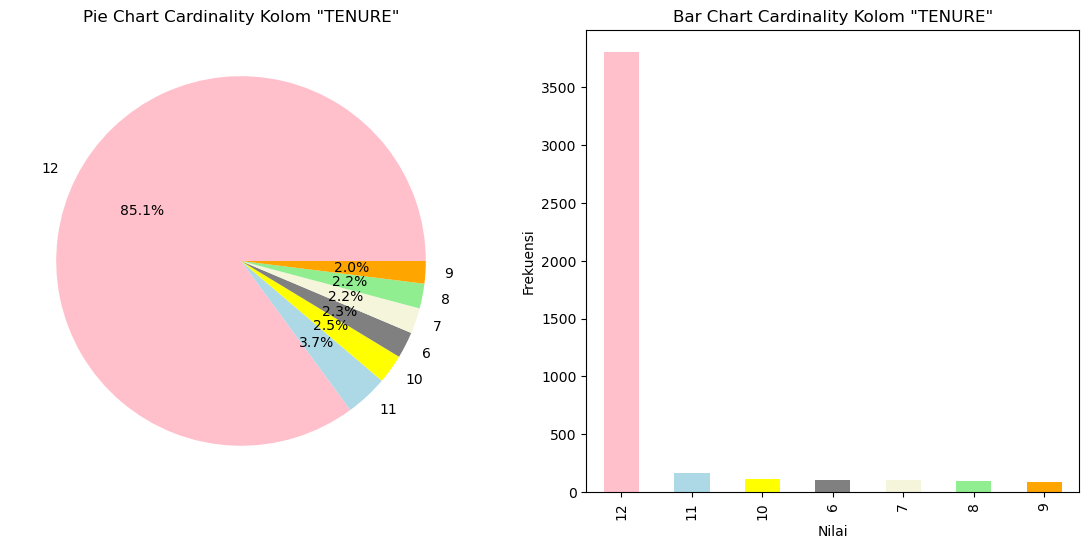

In [12]:
# Count the number of unique values in the 'TENURE' column
value_counts = df['TENURE'].value_counts()
print(value_counts)

# Create subplots for pie charts and bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
colors = ['pink', 'lightblue', 'yellow', 'grey', 'beige', 'lightgreen', 'orange']

# Plotting pie chart
ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors)
ax1.set_title('Pie Chart Cardinality Kolom "TENURE"')

# Plotting bar chart
value_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Bar Chart Cardinality Kolom "TENURE"')
ax2.set_xlabel('Nilai')
ax2.set_ylabel('Frekuensi')

# Display the plot
plt.show()

TENURE terbanyak adalah 12 dan yang paling kecil adalah 9

## **- Data Correlation Check**

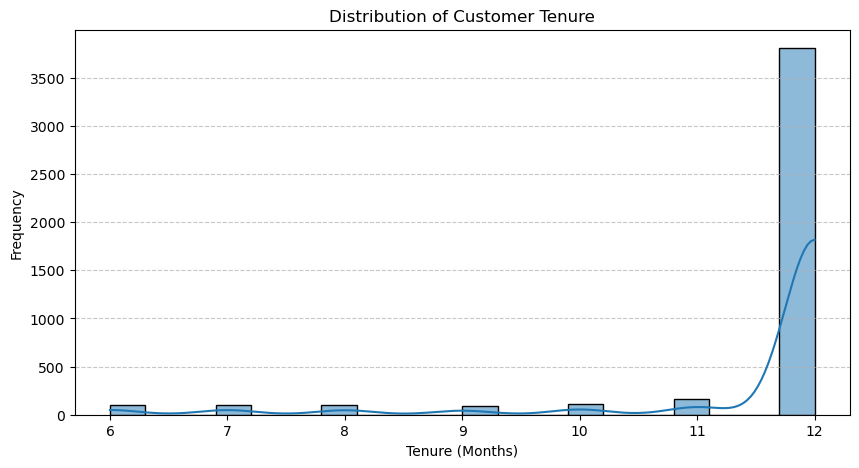

In [13]:
# Make Tenure Distribution Visualization
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='TENURE', bins=20, kde=True)

# Setting up title and lable
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing plot
plt.show()

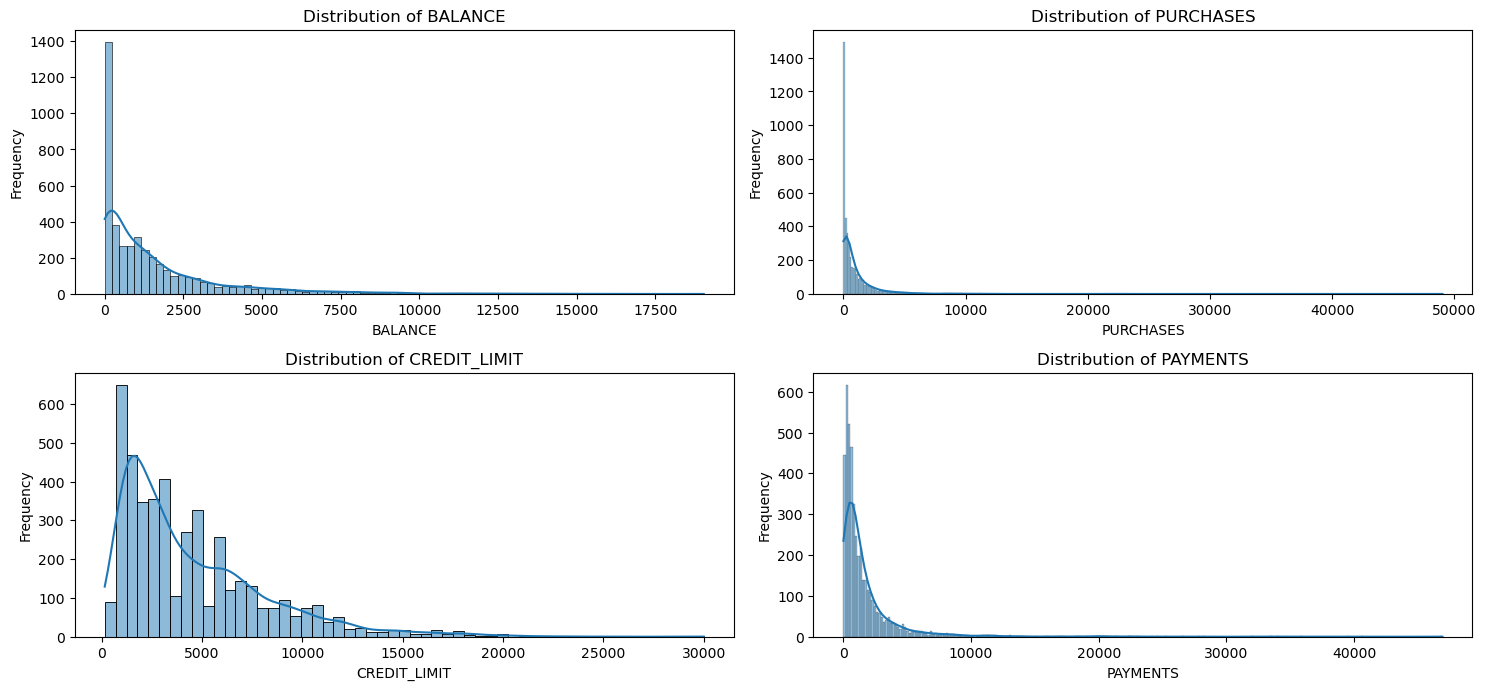

In [14]:
# Select column
columns_to_plot = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']

# Setting figure size
plt.figure(figsize=(15, 10))

# Loop for histogram each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Show figure
plt.tight_layout()
plt.show()

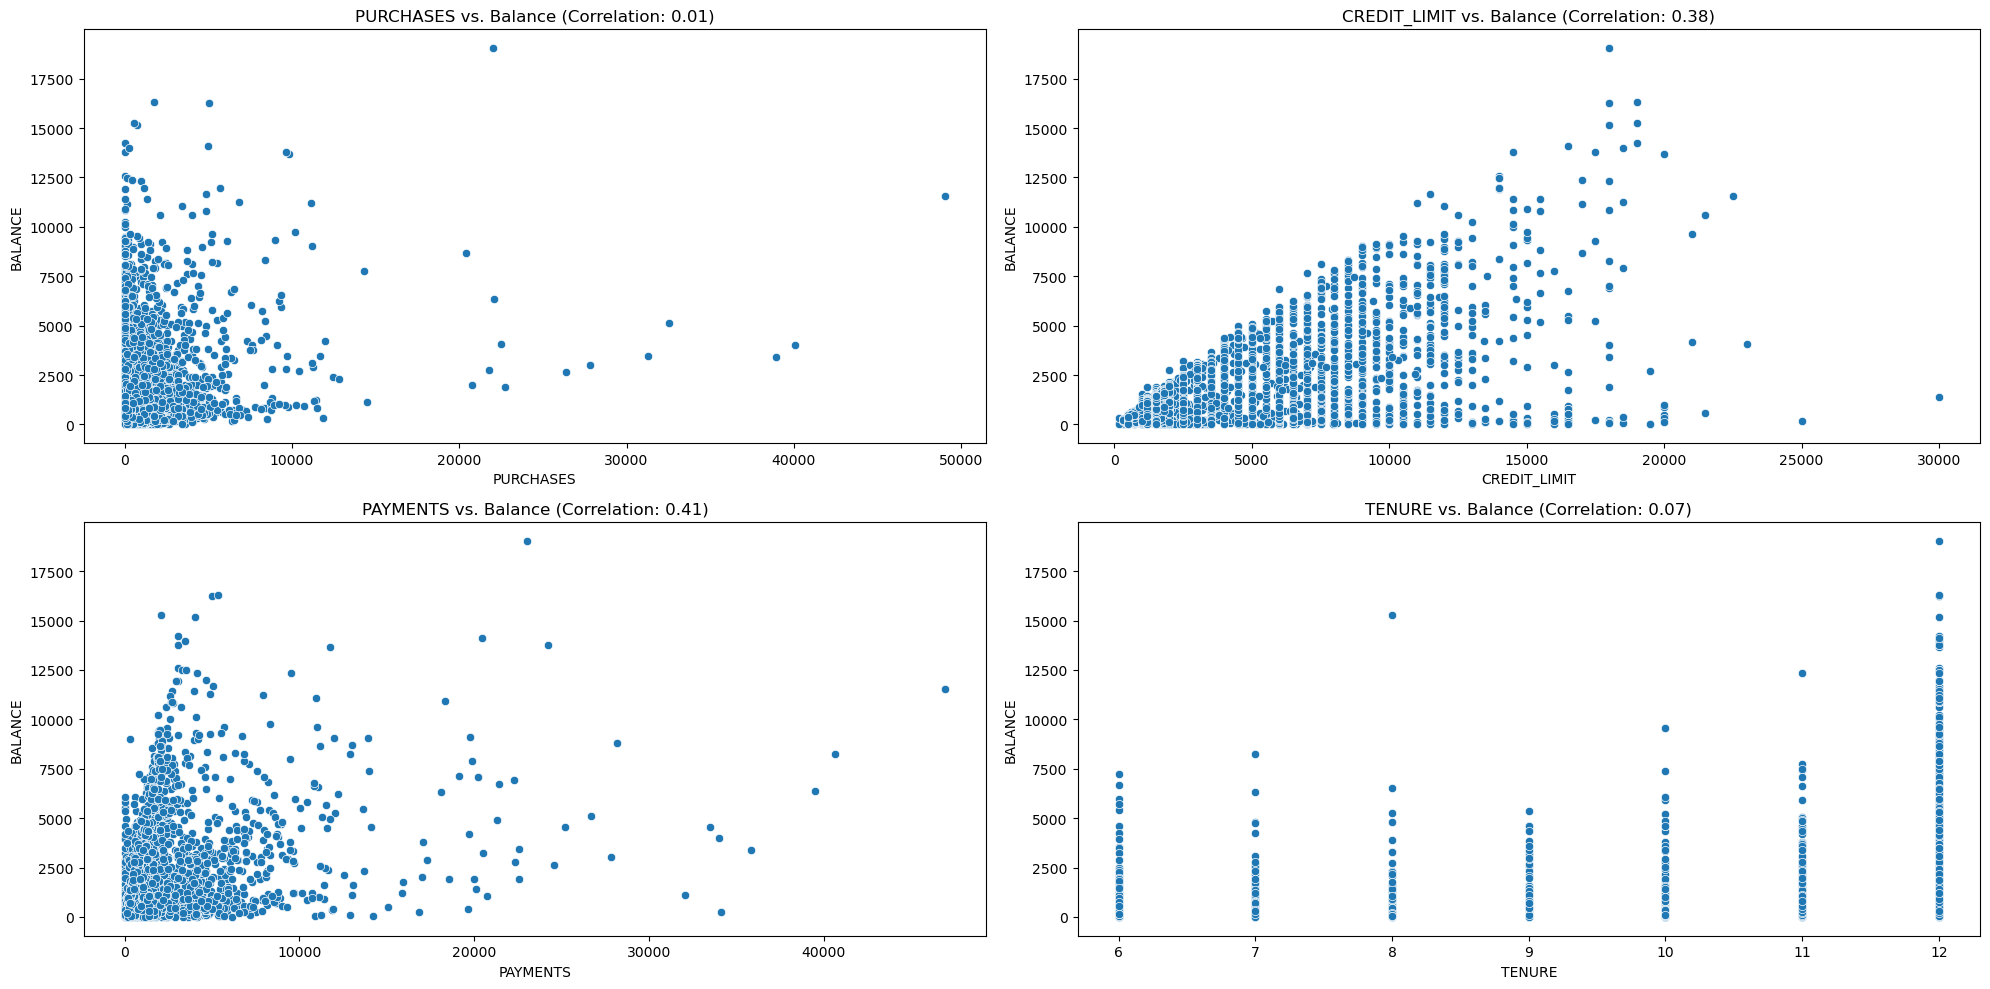

In [15]:
# List of features you're interested in
features = ['PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']

# Create a subplot for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, feature in enumerate(features):
    # Calculate the correlation between the feature and Balance
    correlation = df[feature].corr(df['BALANCE'], method='spearman')
    
    # Create a scatter plot of the feature vs. Balance
    sns.scatterplot(data=df, x=feature, y='BALANCE', ax=axs[i//2, i%2])
    
    # Set the title to include the correlation
    axs[i//2, i%2].set_title(f'{feature} vs. Balance (Correlation: {correlation:.2f})')

plt.tight_layout()
plt.show()

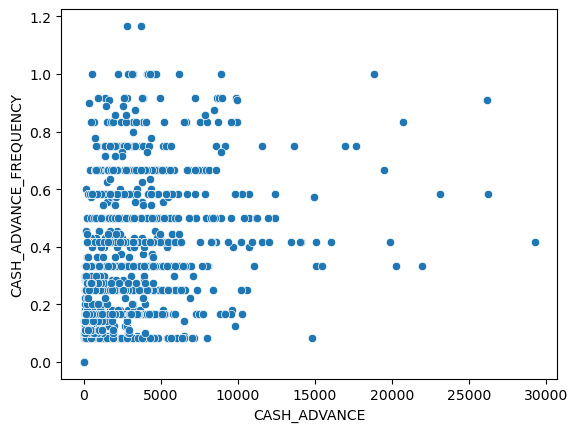

In [16]:
# Membuat scatter plot dengan hue
sns.scatterplot(data=df, x='CASH_ADVANCE', y='CASH_ADVANCE_FREQUENCY')
plt.show()

Dari scatter plot diatas dapat dilihat bahwa tidak terlihat pola atau tren yang jelas yang menghubungkan CASH_ADVANCE dengan CASH_ADVANCE_FREQUENCY secara langsung, karena titiknya tidak membentuk sebuah kurva. Serta terdapat banyak titik yang terkumpul di sekitar nilai rendah CASH_ADVANCE dan CASH_ADVANCE_FREQUENCY, yang mengindikasikan bahwa mayoritas pengamatan memiliki nilai rendah untuk kedua variabel tersebut.

<Axes: >

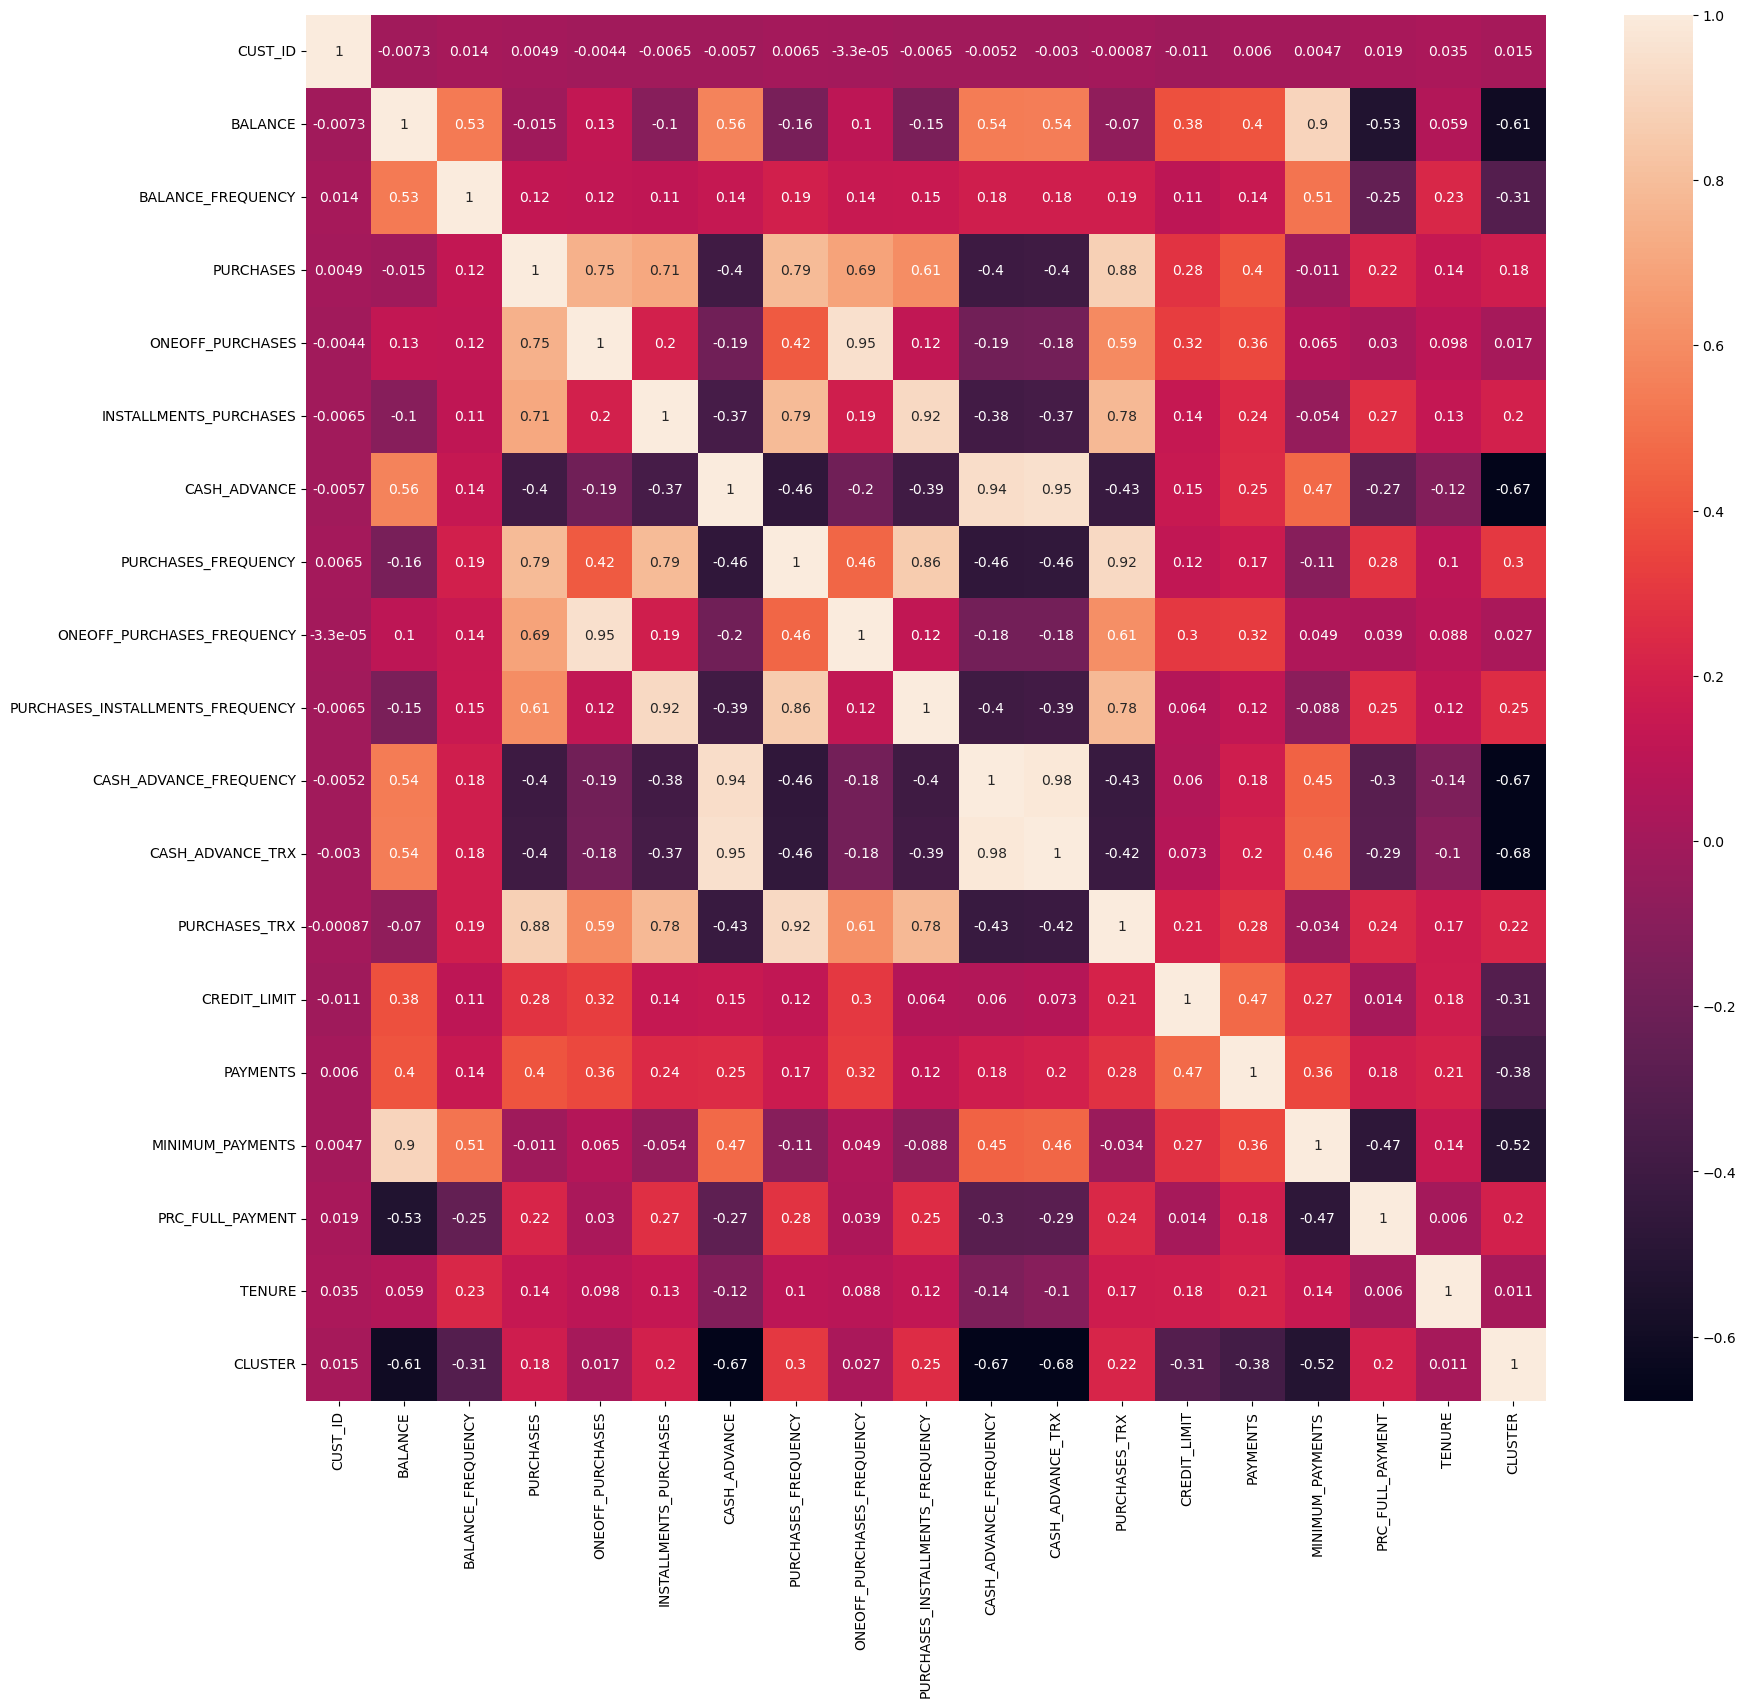

In [373]:
# Visualisasi heatmap untuk melihat korelasi antar kolom
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(method='spearman'), annot=True)

Kolom yang memiliki korelasi positif terbesar adalah CASH_ADVANCE_TRX dengan CASH_ADVANCE_FREQUENCY. Sedangkan memiliki korelasi negatif terbesar adalah PRC_FULL_PAYMENT dan BALANCE

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Feature Engineering**</p>

## **- Missing Value Handling**

In [17]:
# Delete rows that contain missing values
df = df.dropna().reset_index(drop=True)

In [18]:
# Re-check the missing value
df.isna().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

**Explanation :**  

There are no missing value in Data Frame, Handling missing value is successfully.

## **- Outlier Handling**

In [288]:
# Define frame data columns
kolom_df = df.select_dtypes(include=np.number).columns.to_list()

# Create an empty list to store columns with normal distribution
data_df_normal = []
kolom_df_normal = []

# Create an empty list to store columns with skewed distribution
data_df_skewed = []
kolom_df_skewed = []

# Looping for each column in column_df
for kolom in kolom_df:
    skewness = df[kolom].skew()
    
    # For normal distribution data
    if skewness <= 0.5 and skewness >= -0.5:            
        kolom_df_normal.append(kolom)
        data_df_normal.append([kolom, skewness])
        
    # For skewed distribution data
    elif skewness < -0.5 or skewness > 0.5:
        kolom_df_skewed.append(kolom)
        data_df_skewed.append([kolom, skewness])

In [289]:
# Display normal distributed columns as data frame
pd.DataFrame(data=data_df_normal, columns=['normal_distribution_columns', 'skewness'])

kolom_terdistribusi_normal  skewness
0                           CUST_ID -0.000256
1               PURCHASES_FREQUENCY  0.035642
2  PURCHASES_INSTALLMENTS_FREQUENCY  0.486577

Kolom yang memiliki distribusi normal adalah CUST_ID, PURCHASES_FREQUENCY, dan, PURCHASES_INSTALLMENTS_FREQUENCY

In [290]:
# Display the skewed column as a data frame
pd.DataFrame(data=data_df_skewed, columns=['skewed_columns', 'skewness'])

kolom_skewed   skewness
0                      BALANCE   2.440901
1            BALANCE_FREQUENCY  -2.083168
2                    PURCHASES   8.902272
3             ONEOFF_PURCHASES  10.045515
4       INSTALLMENTS_PURCHASES   8.030305
5                 CASH_ADVANCE   4.713175
6   ONEOFF_PURCHASES_FREQUENCY   1.494505
7       CASH_ADVANCE_FREQUENCY   1.788835
8             CASH_ADVANCE_TRX   4.722877
9                PURCHASES_TRX   4.429897
10                CREDIT_LIMIT   1.525379
11                    PAYMENTS   5.987445
12            MINIMUM_PAYMENTS  12.356758
13            PRC_FULL_PAYMENT   1.854400
14                      TENURE  -2.996978

Kolom yang memiliki distribusi skewed adalah :  
BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, ONEOFF_PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, dan TENURE

#### Cek Kolom Low Variance

In [291]:
# Calculating the IQR of each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define thresholds
threshold = 0.05

# Display columns with a small IQR
compact_cols = IQR[IQR < threshold].index.tolist()
print("Columns with limited value distribution :", compact_cols)

Kolom dengan sebaran nilai yang terbatas : ['TENURE']


In [292]:
# Delete the low variation column in the skewed distribution and insert it into the normal distribution
for col in compact_cols:
    if col in kolom_df_skewed:
        kolom_df_skewed.remove(col)
        kolom_df_normal.append(col)
        print(f"{col} Column successfully inserted into the list kolom_df_normal")
    else:
        print(f"{col} Column not in the list kolom_df_skewed")

Kolom TENURE berhasil dimasukkan ke dalam list kolom_df_normal


#### Capping menggunakan Winsorizer

In [293]:
# Capping for normal distribution data
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_df_normal,
                            missing_values='ignore')

# Fit Transform df 
df_capped = winsorizer_normal_dist.fit_transform(df)

Berhasil melakukan capping untuk data distribusi normal menggunakan metode gaussian.

In [294]:
# Capping for skew distribution data
winsorizer_skewed = Winsorizer(capping_method = 'iqr',
                            tail = 'both',
                            fold = 1.5,
                            variables = kolom_df_skewed
                            )

# Fit & Transforming df 
df_capped = winsorizer_skewed.fit_transform(df)

Berhasil melakukan capping untuk data distribusi skewed menggunakan metode iqr.

#### Plot Visualisasi

In [295]:
# Plots for comparison of distributions before and after capping
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    Function to display the graph comparison before and after handling outliers.
    """
    # Graph size
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Histogram before capping
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='pink')
    axes[0, 0].set_title('Histogram Before')

    # Boxplot before capping
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='grey')
    axes[1, 0].set_title('Boxplot Before')

    # Histogram after capping
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='pink')
    axes[0, 1].set_title('Histogram After')

    # Boxplot after capping
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='grey')
    axes[1, 1].set_title('Boxplot After')

    # Display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

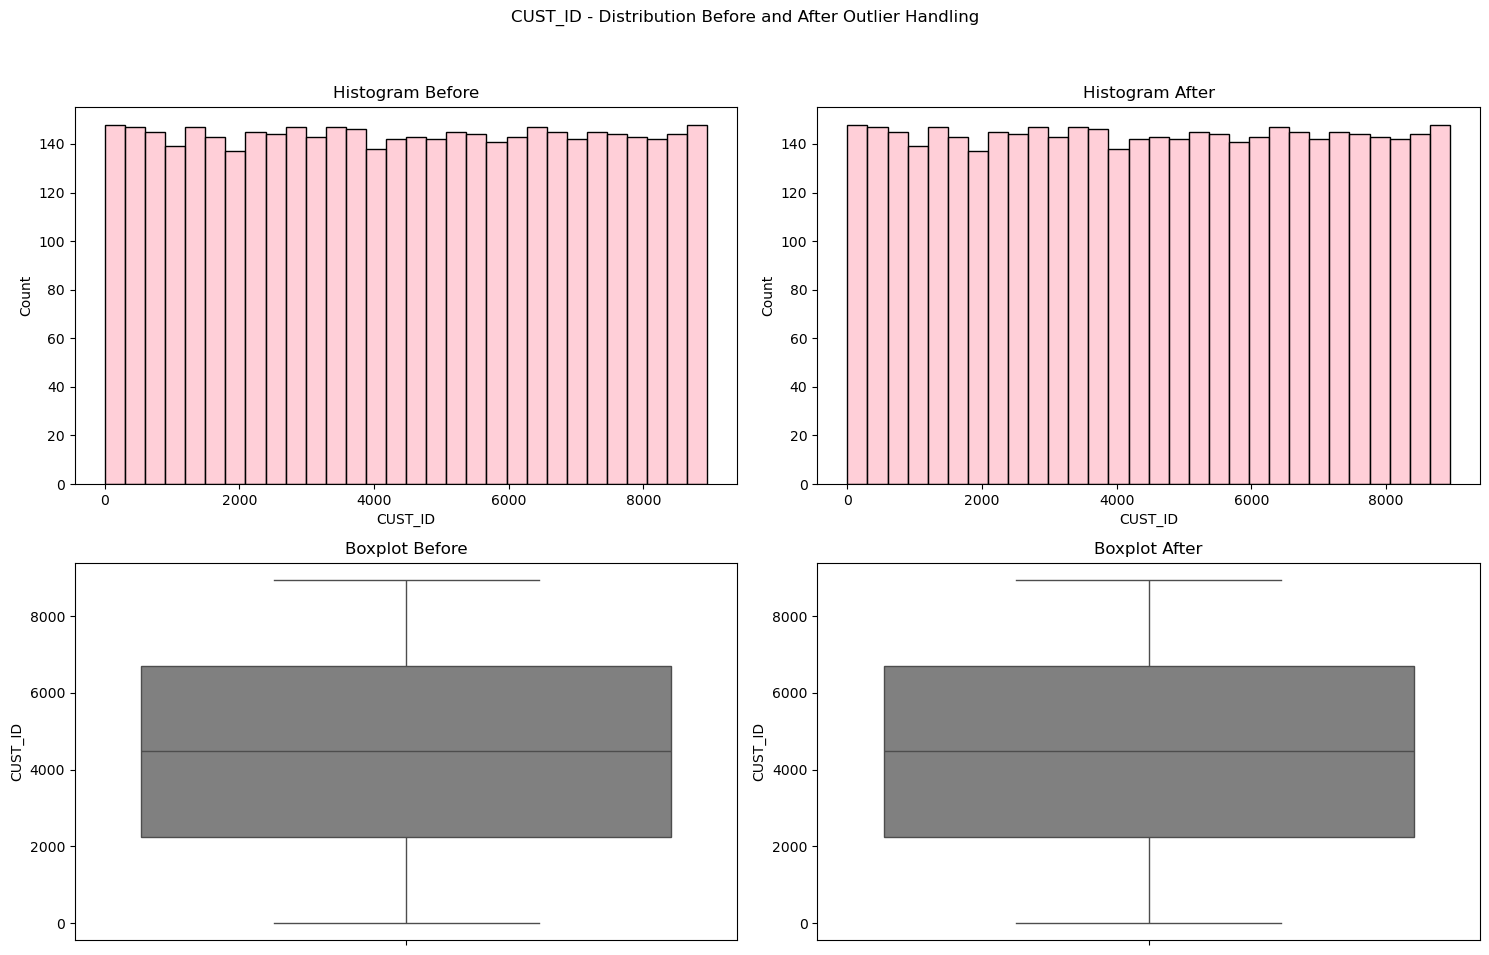

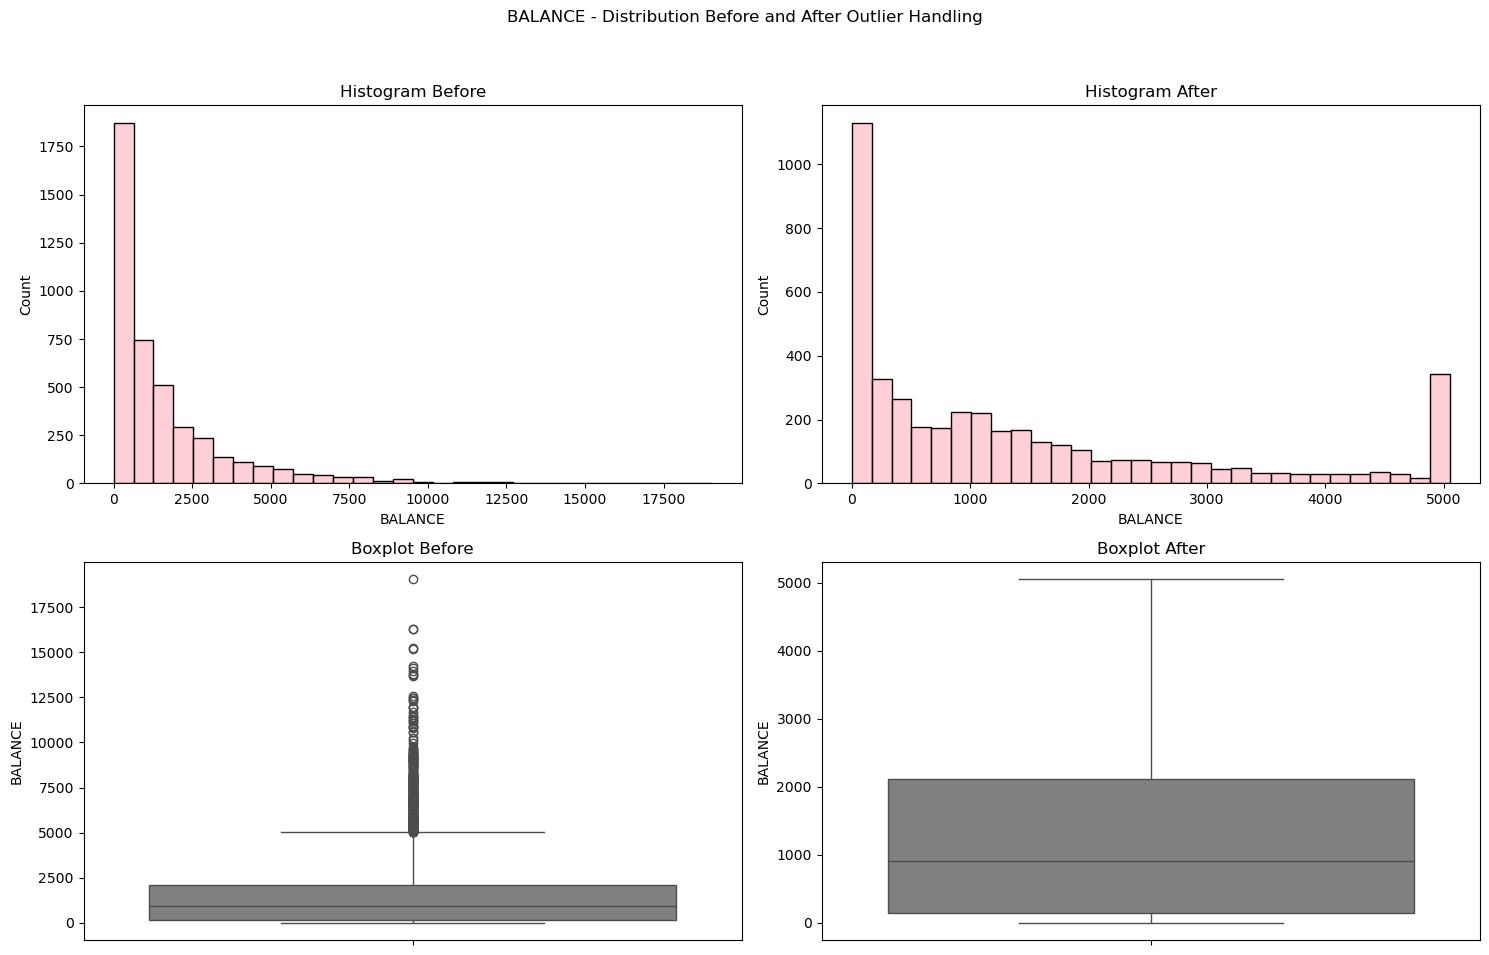

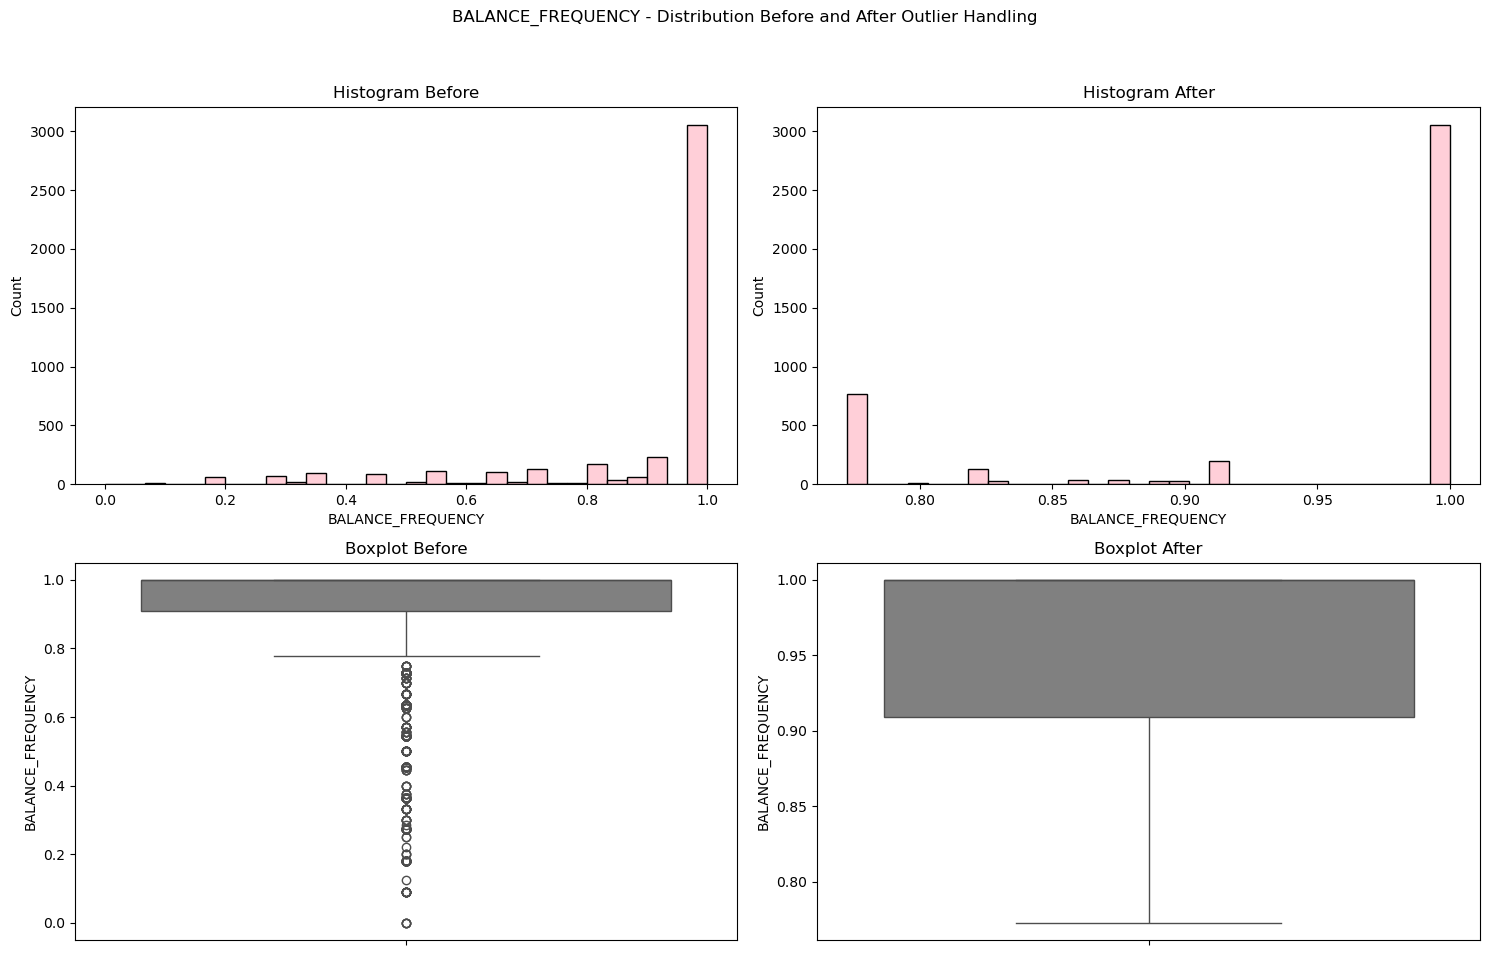

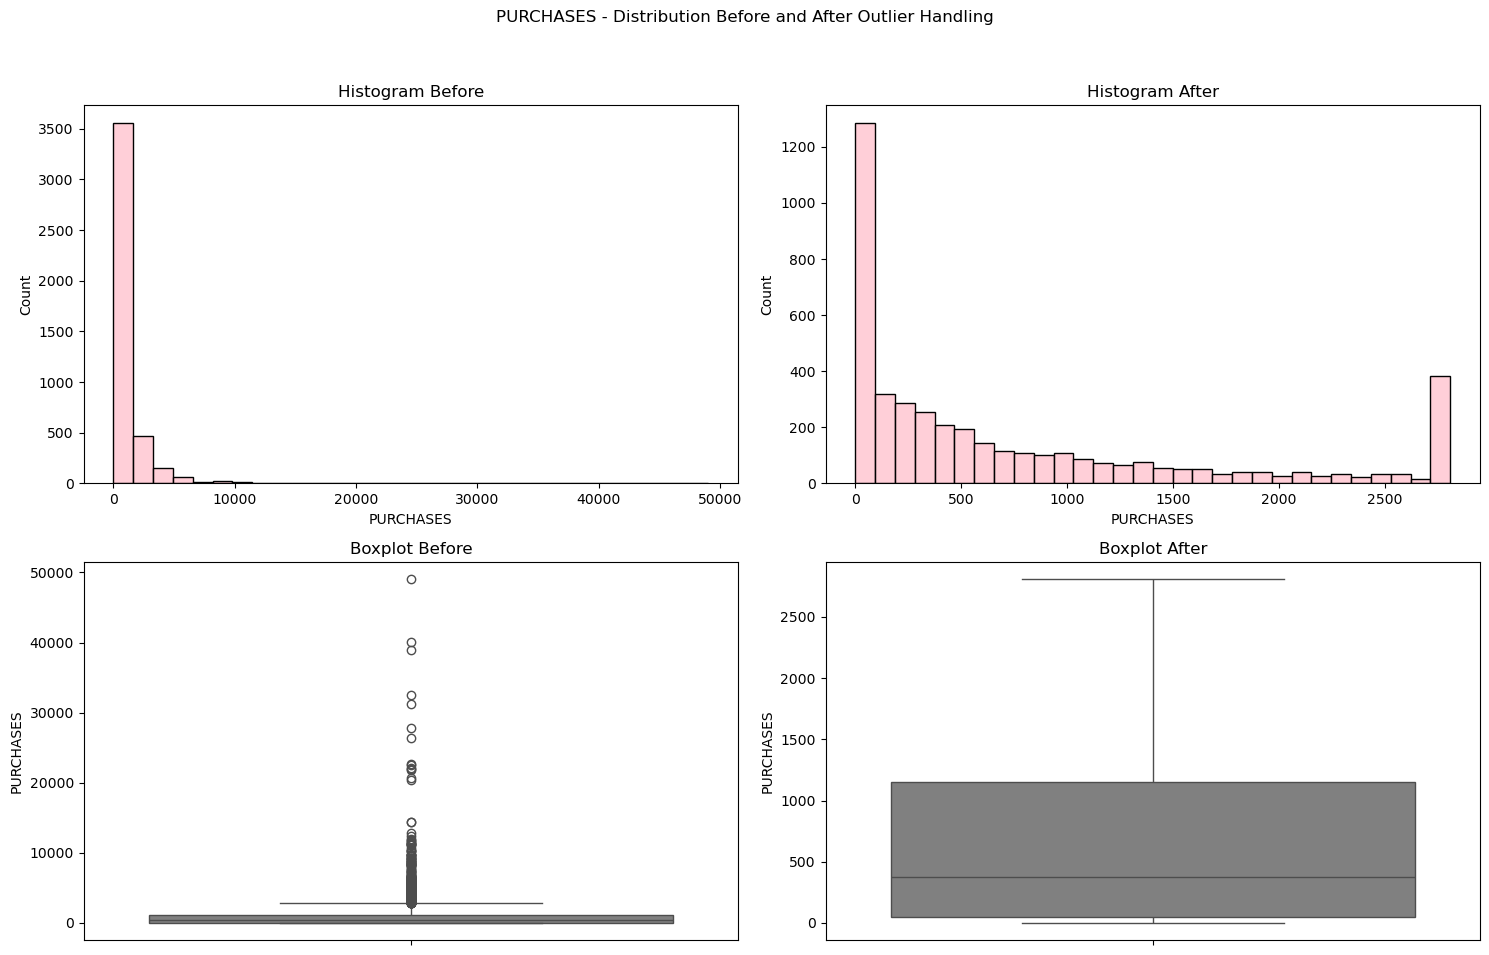

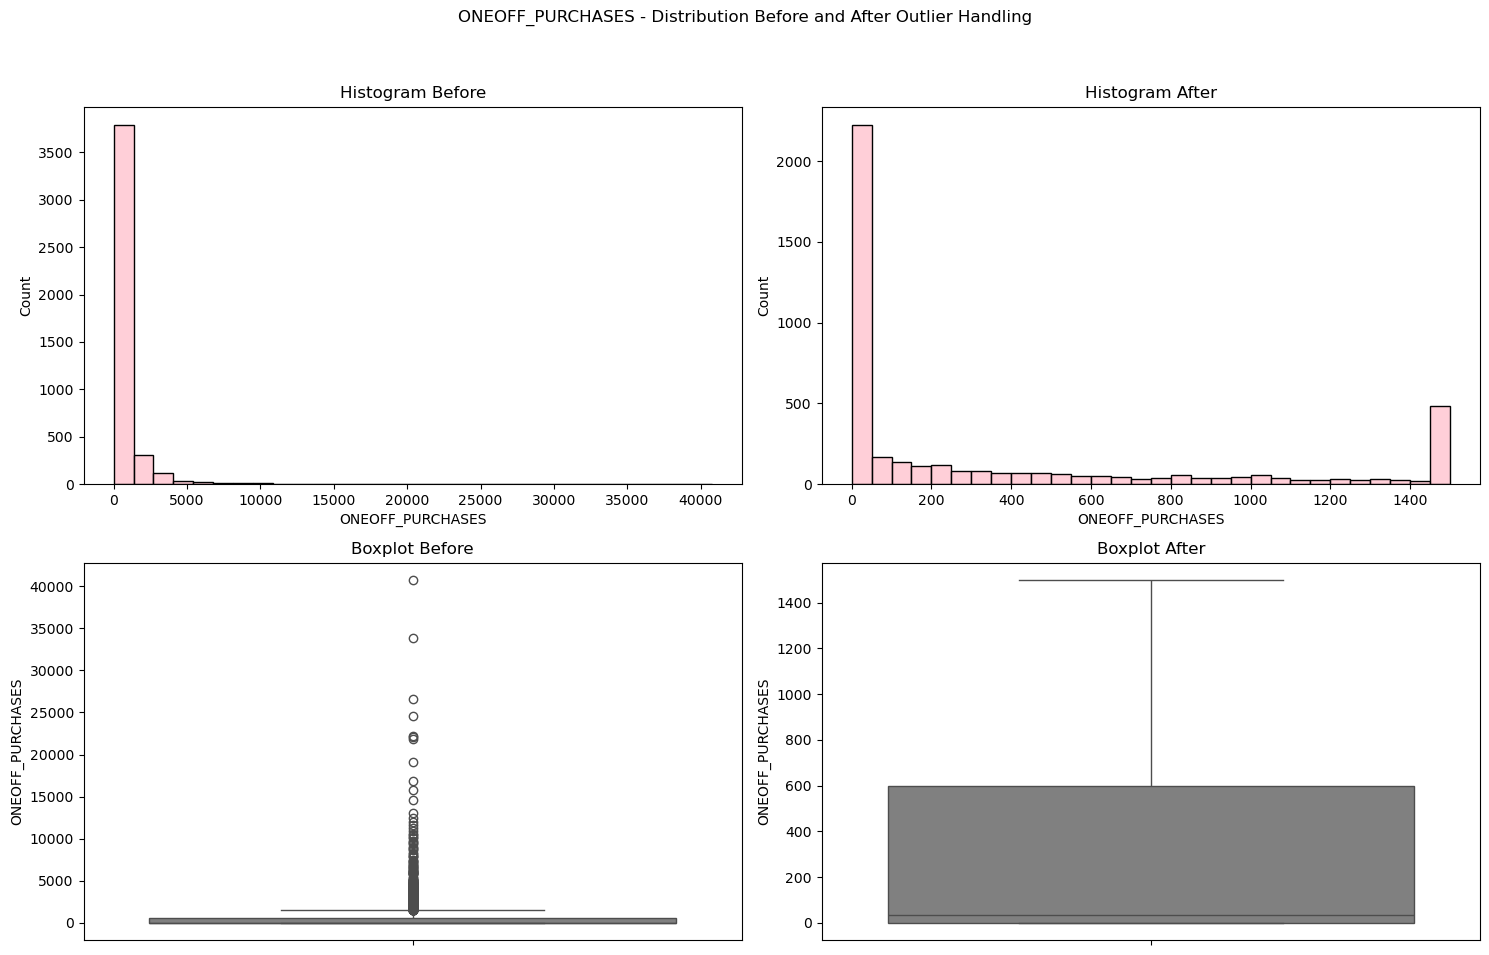

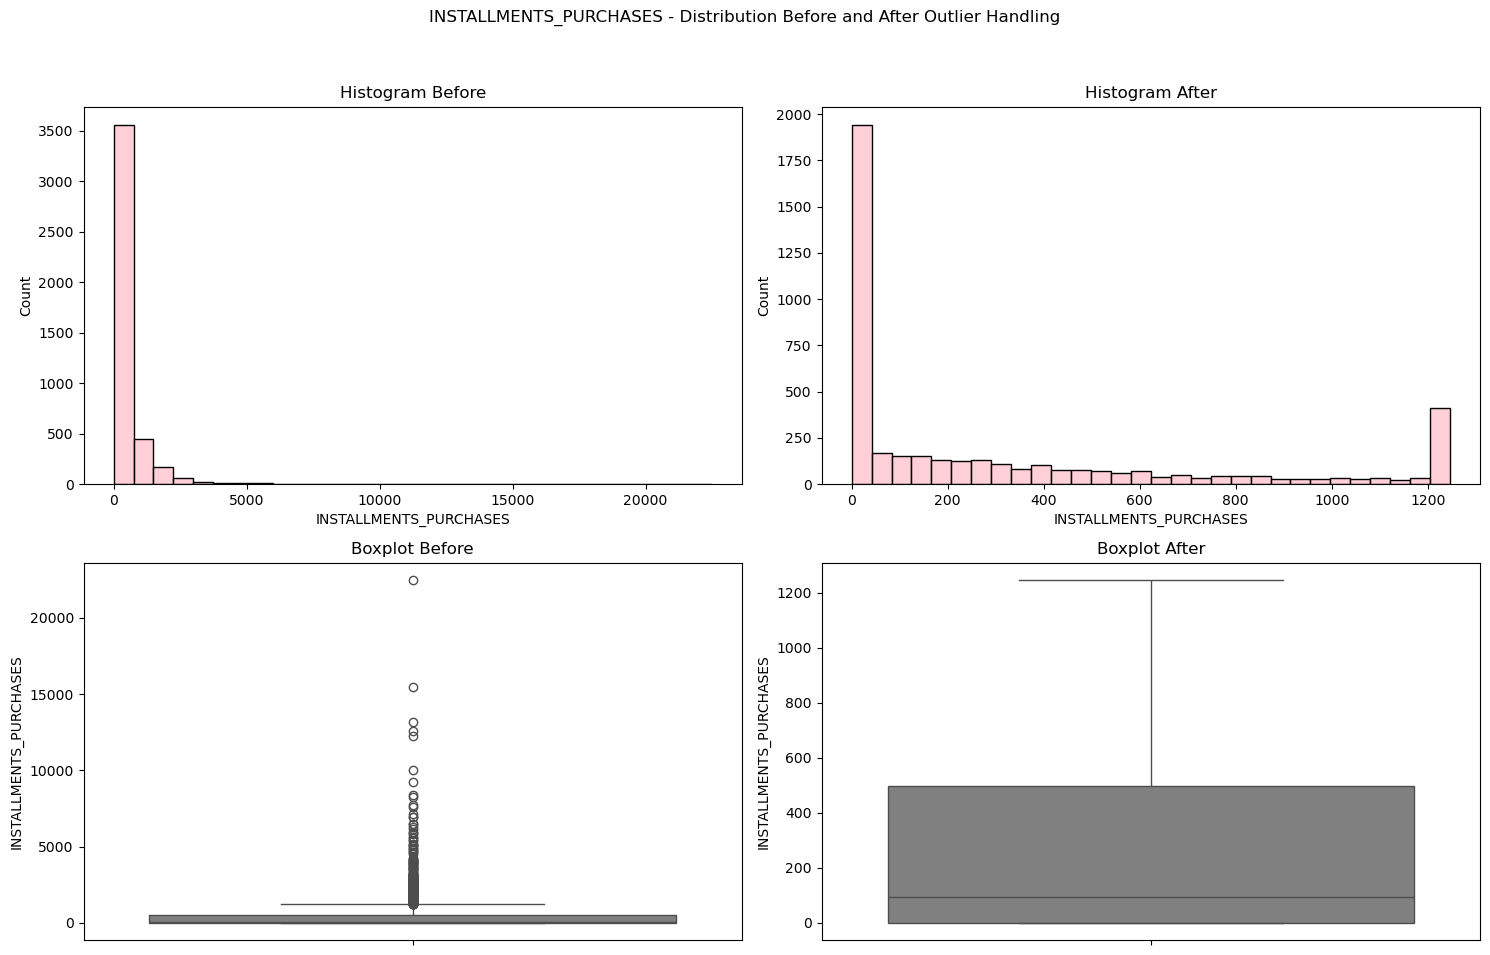

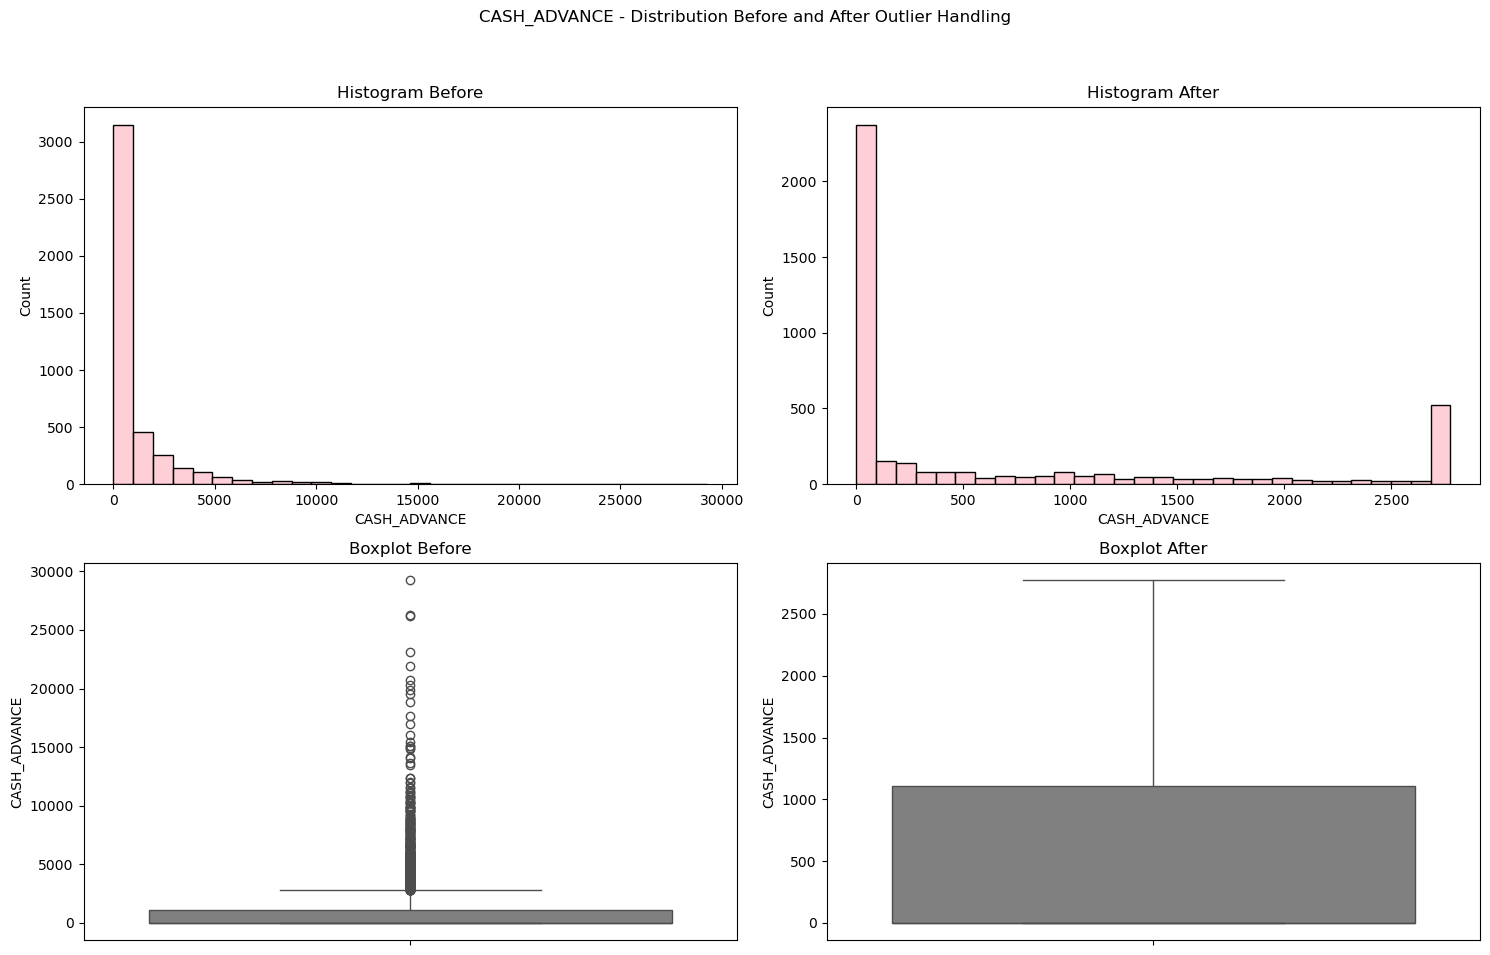

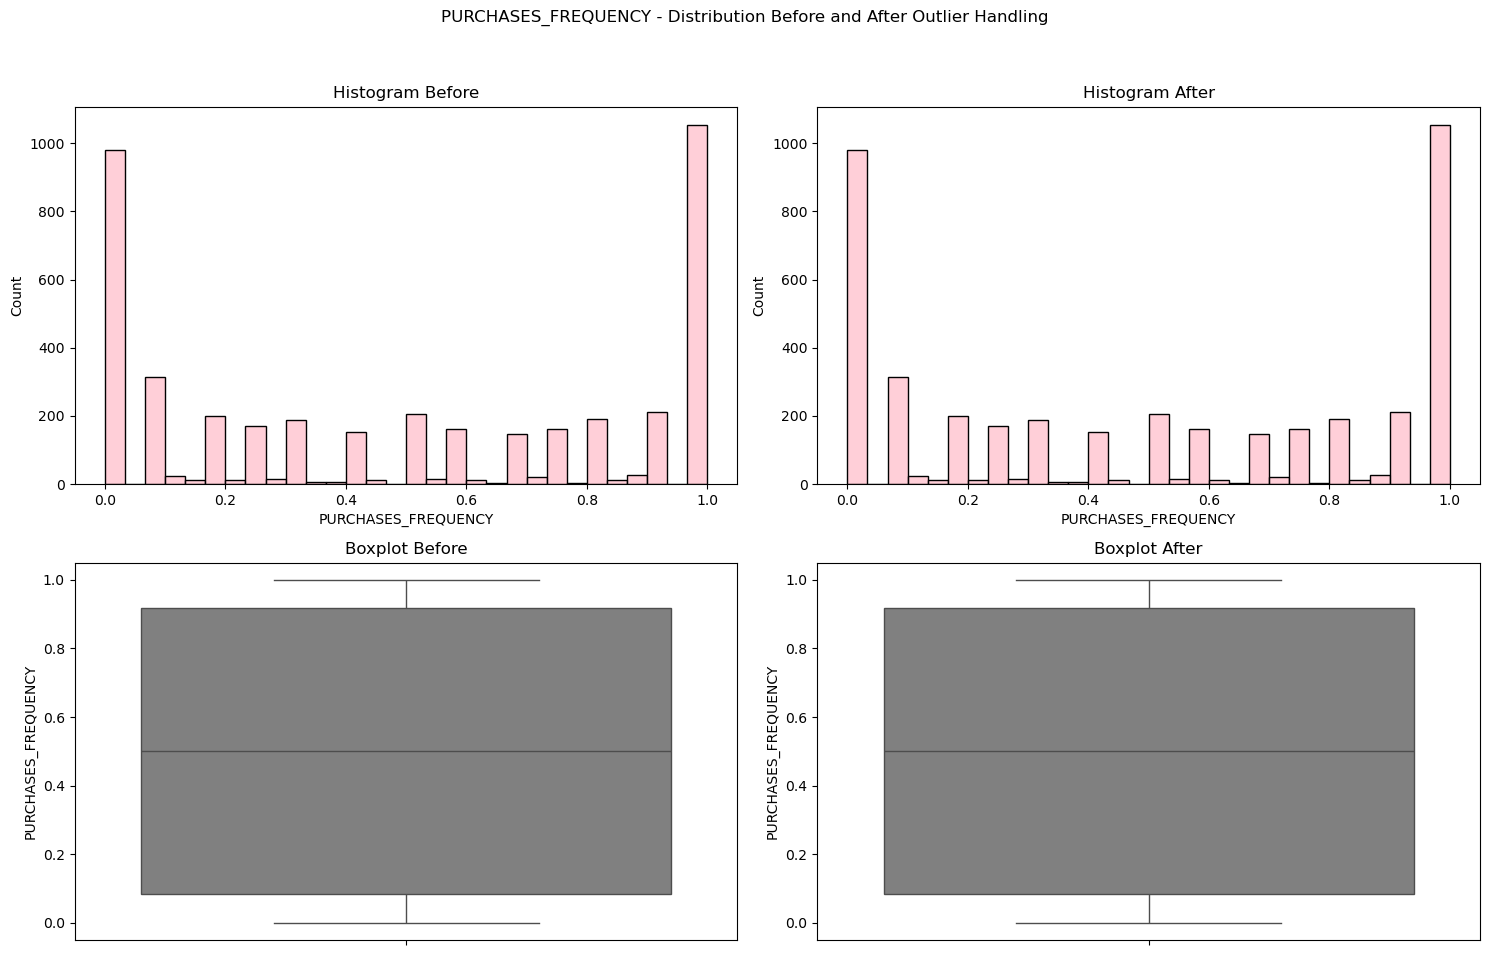

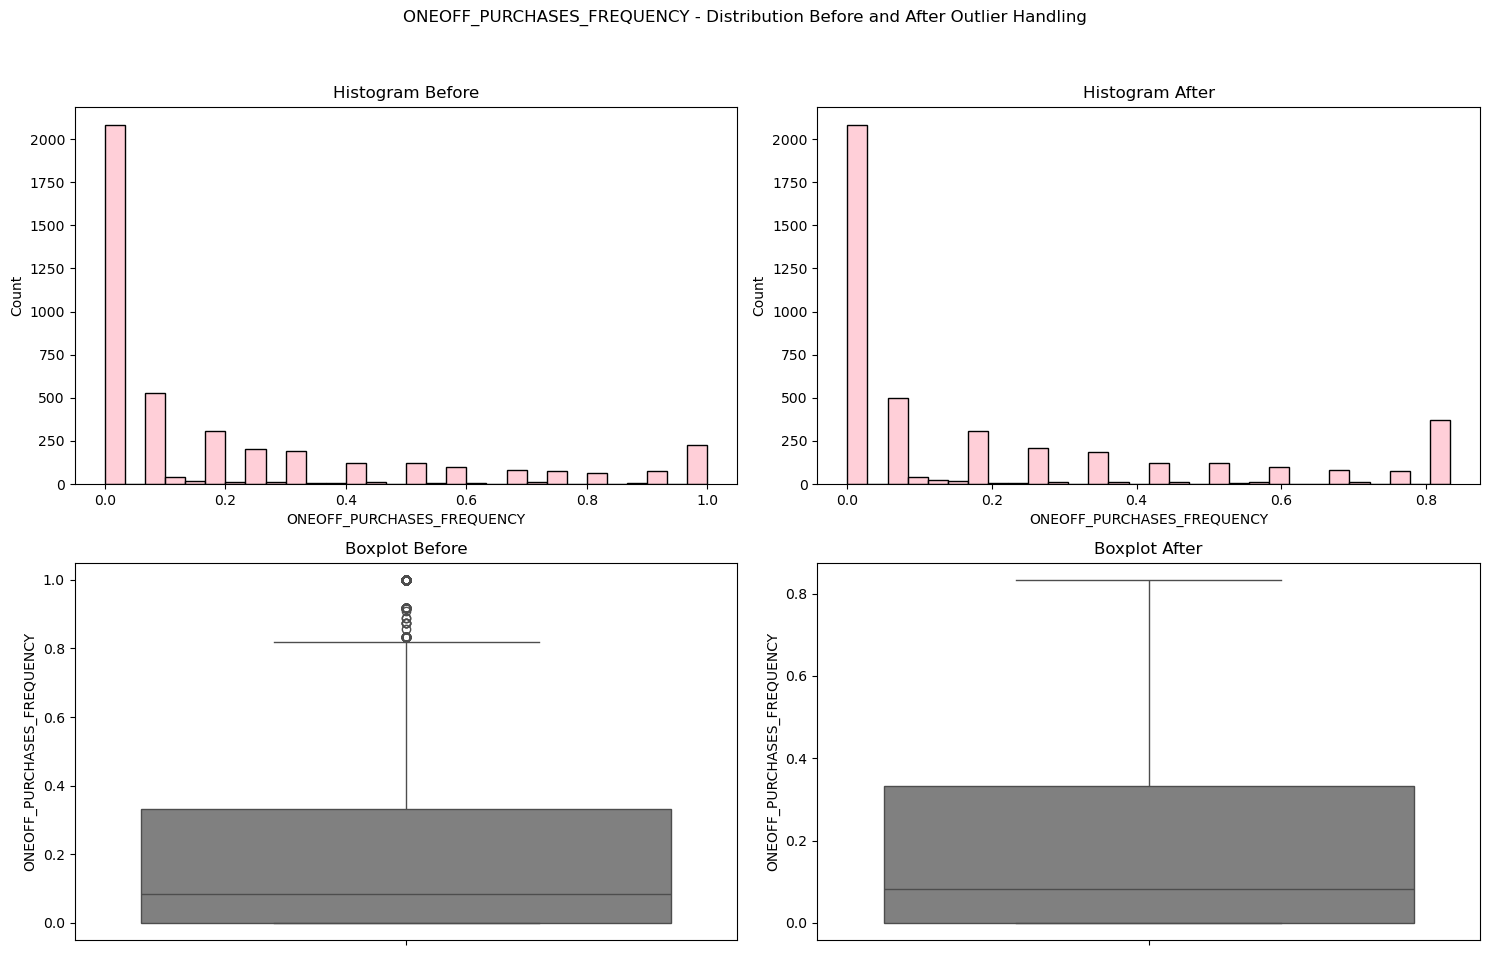

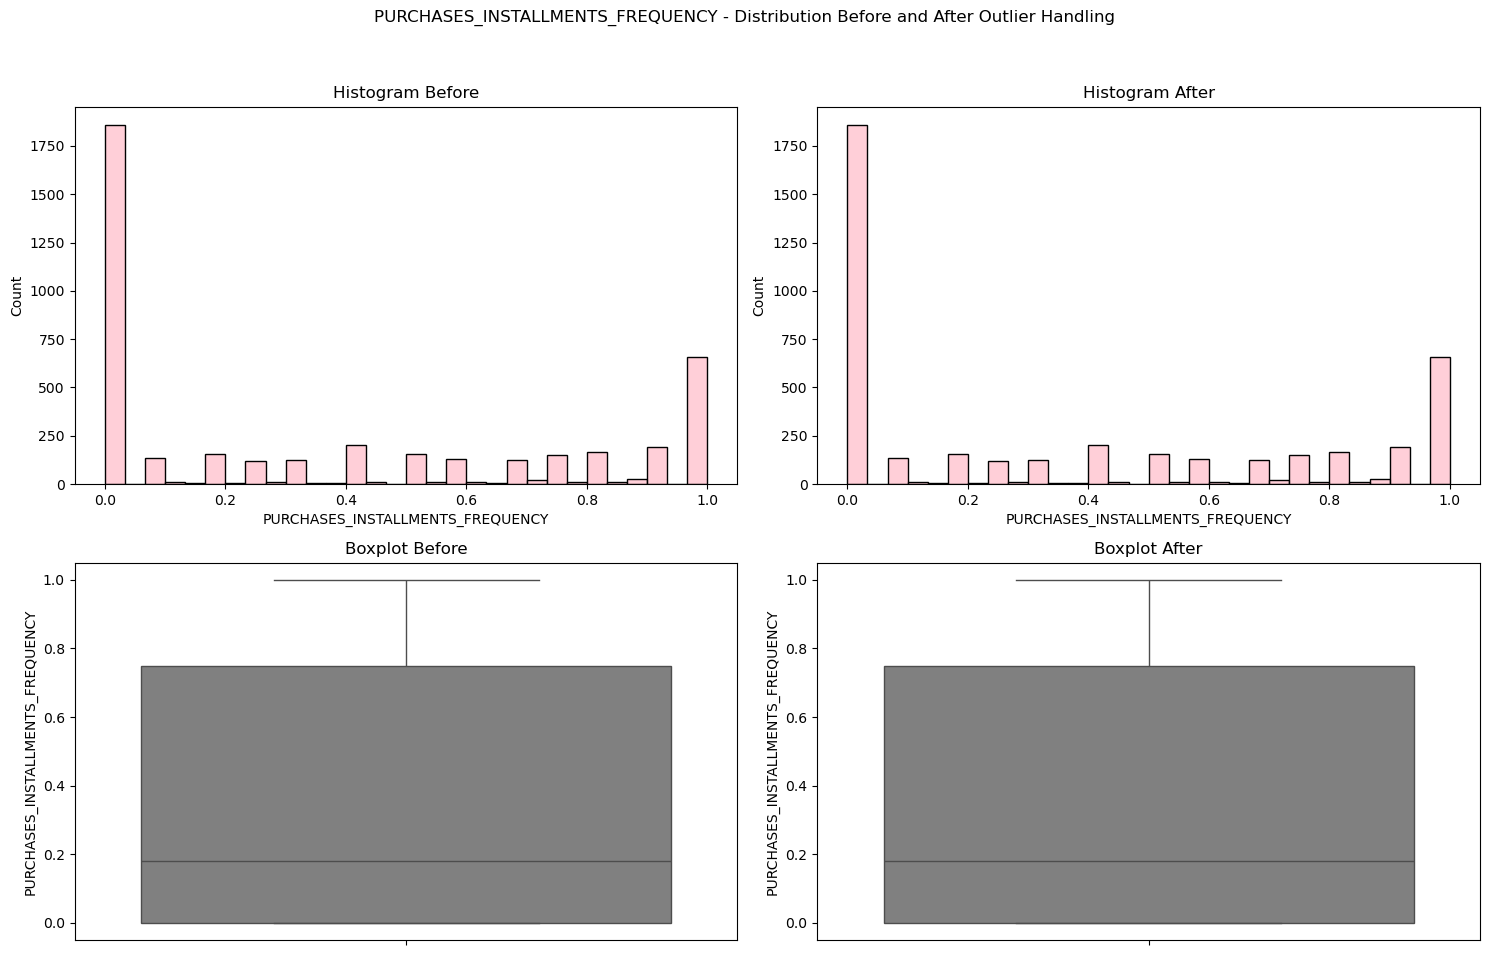

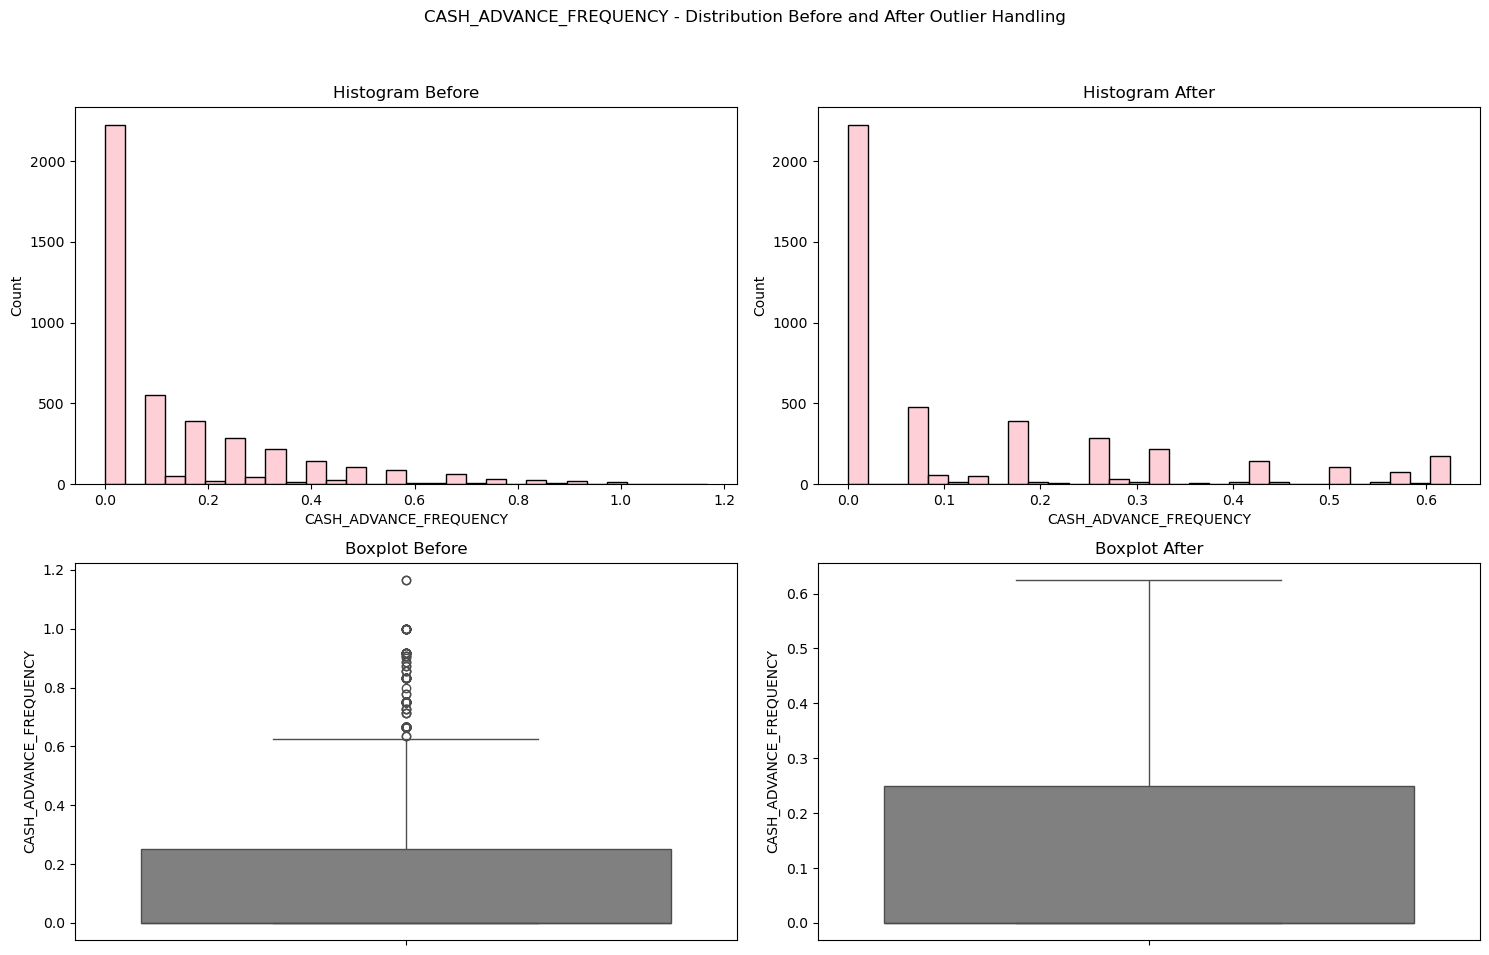

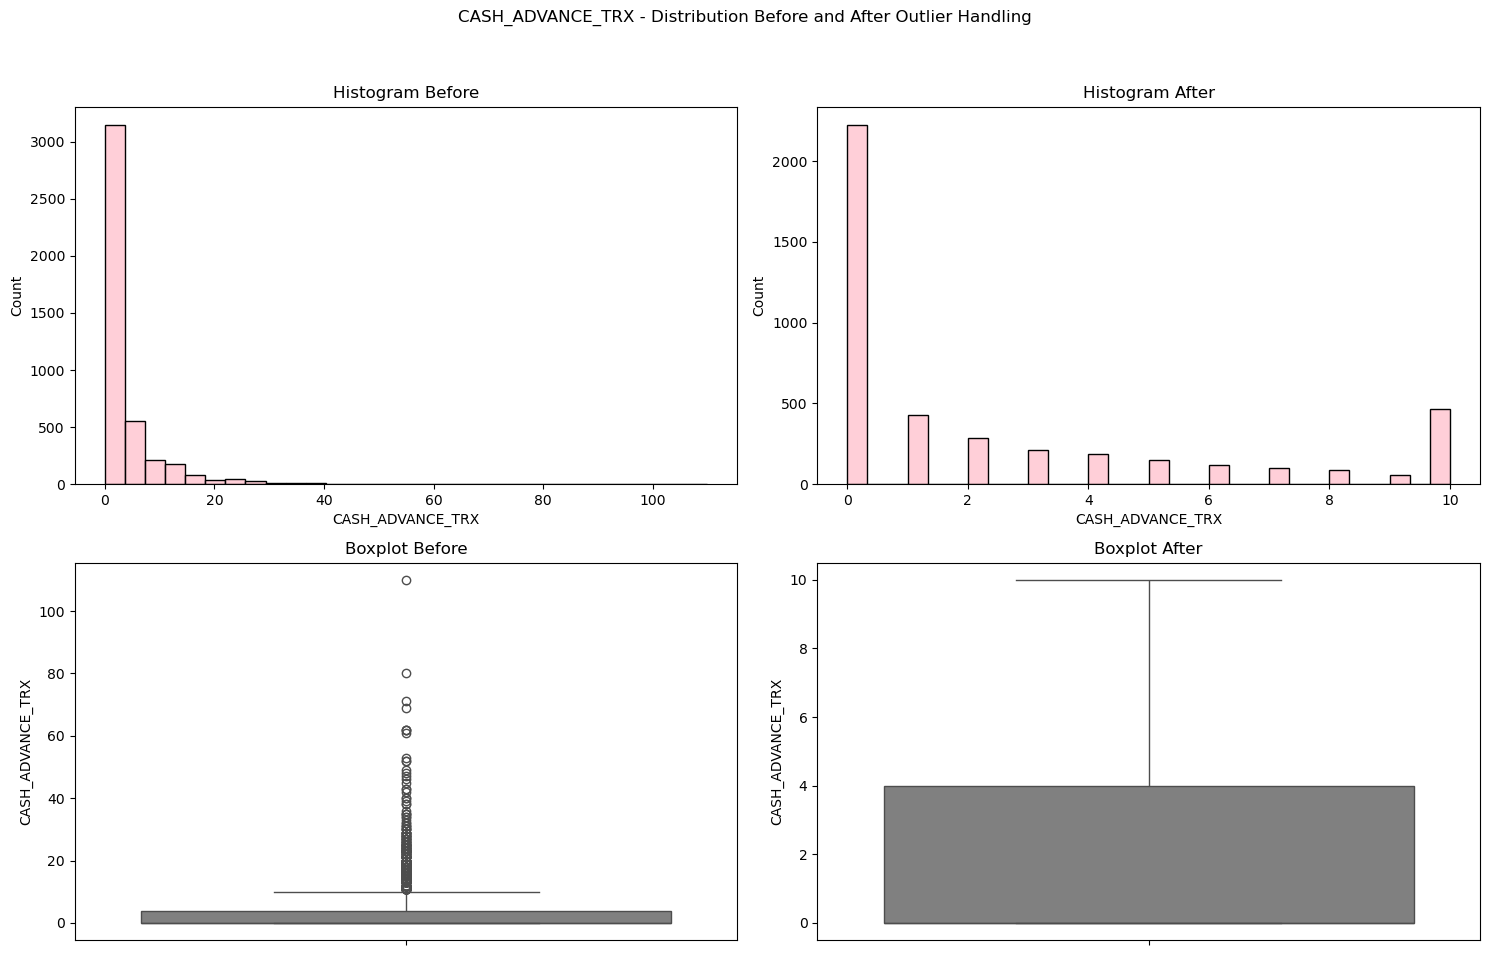

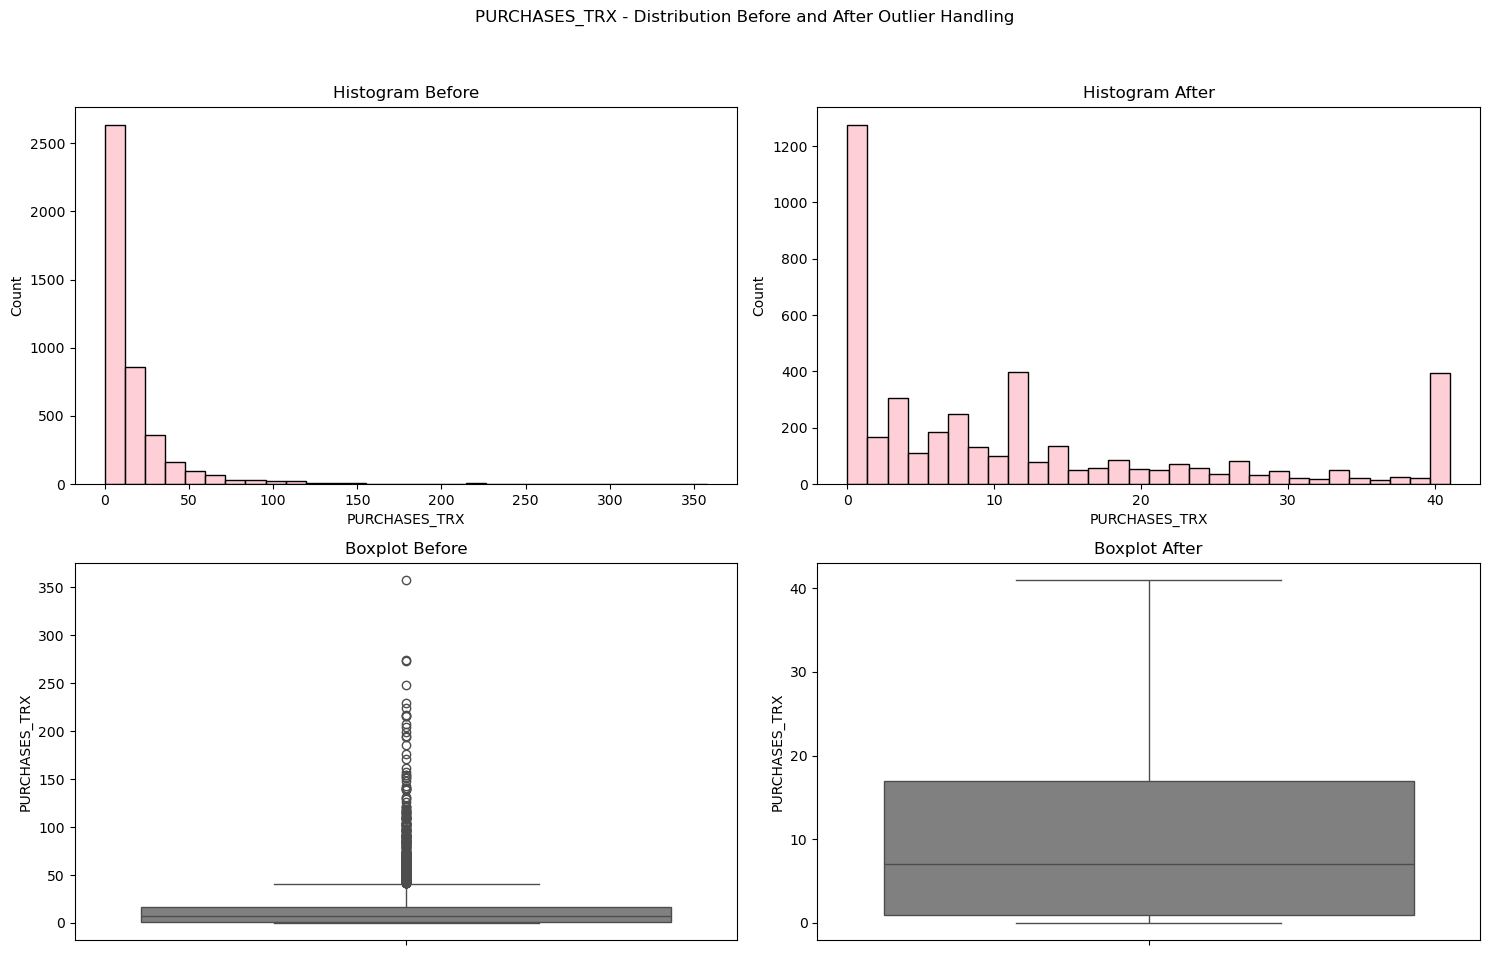

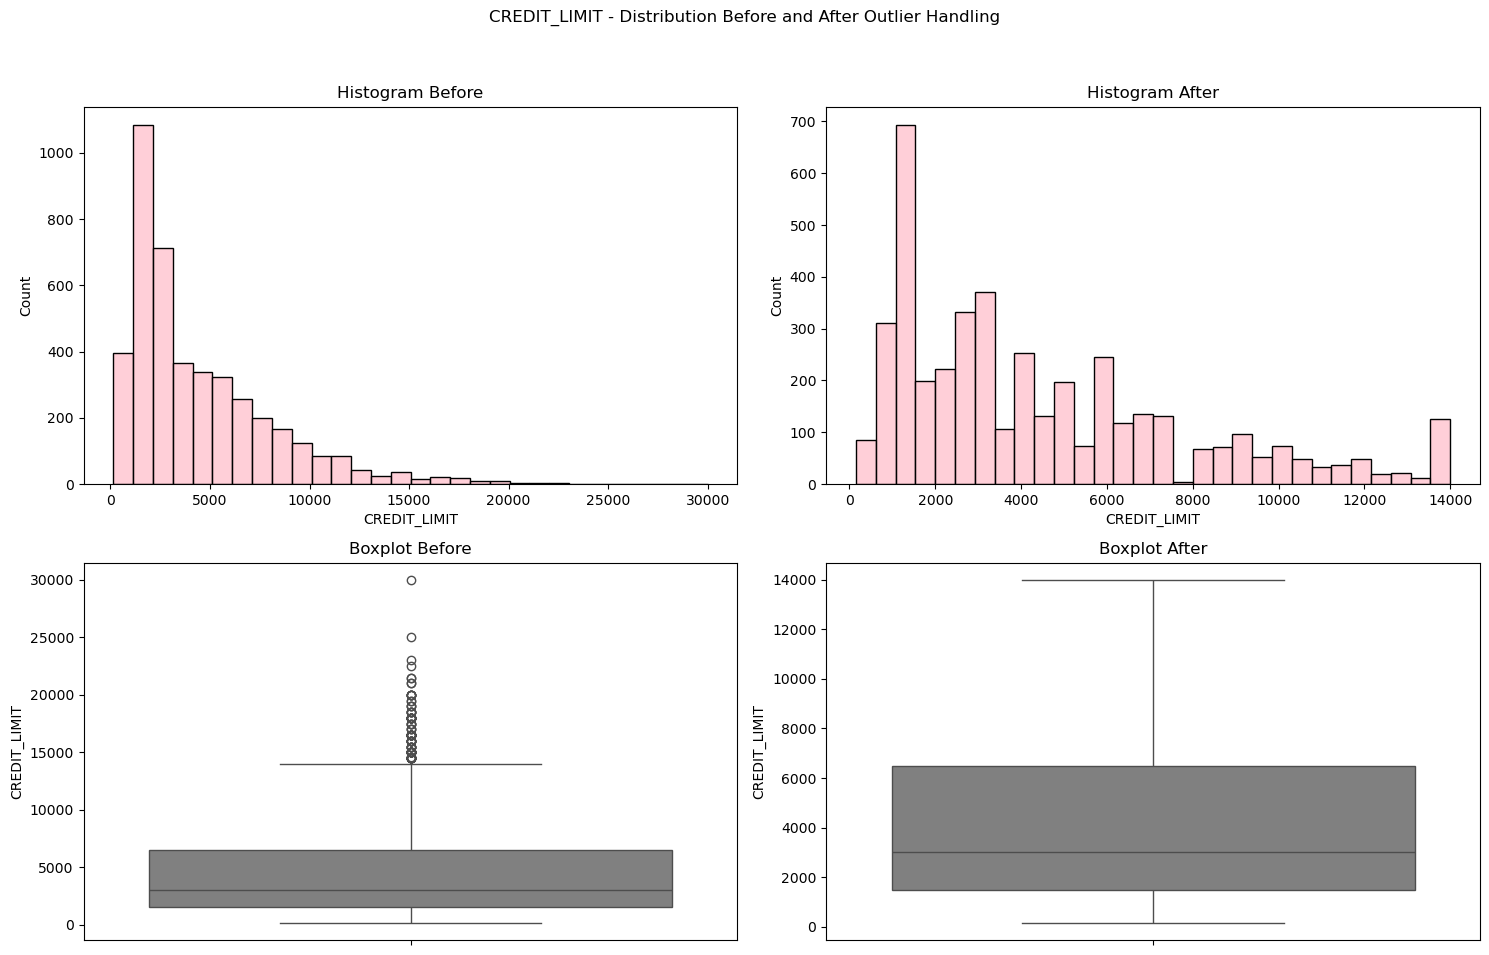

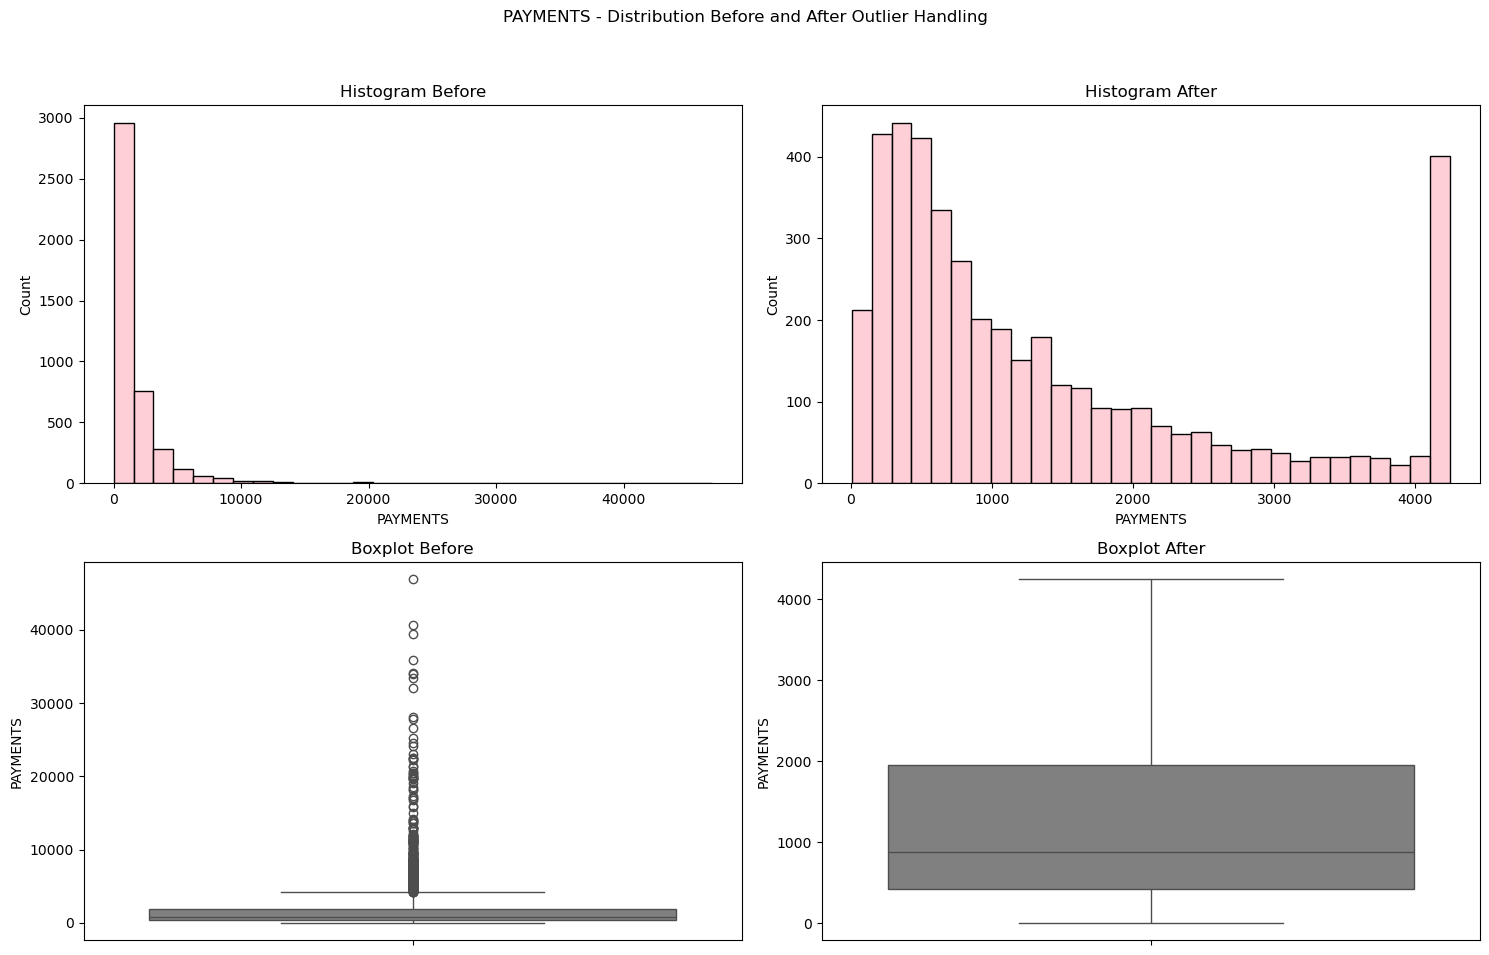

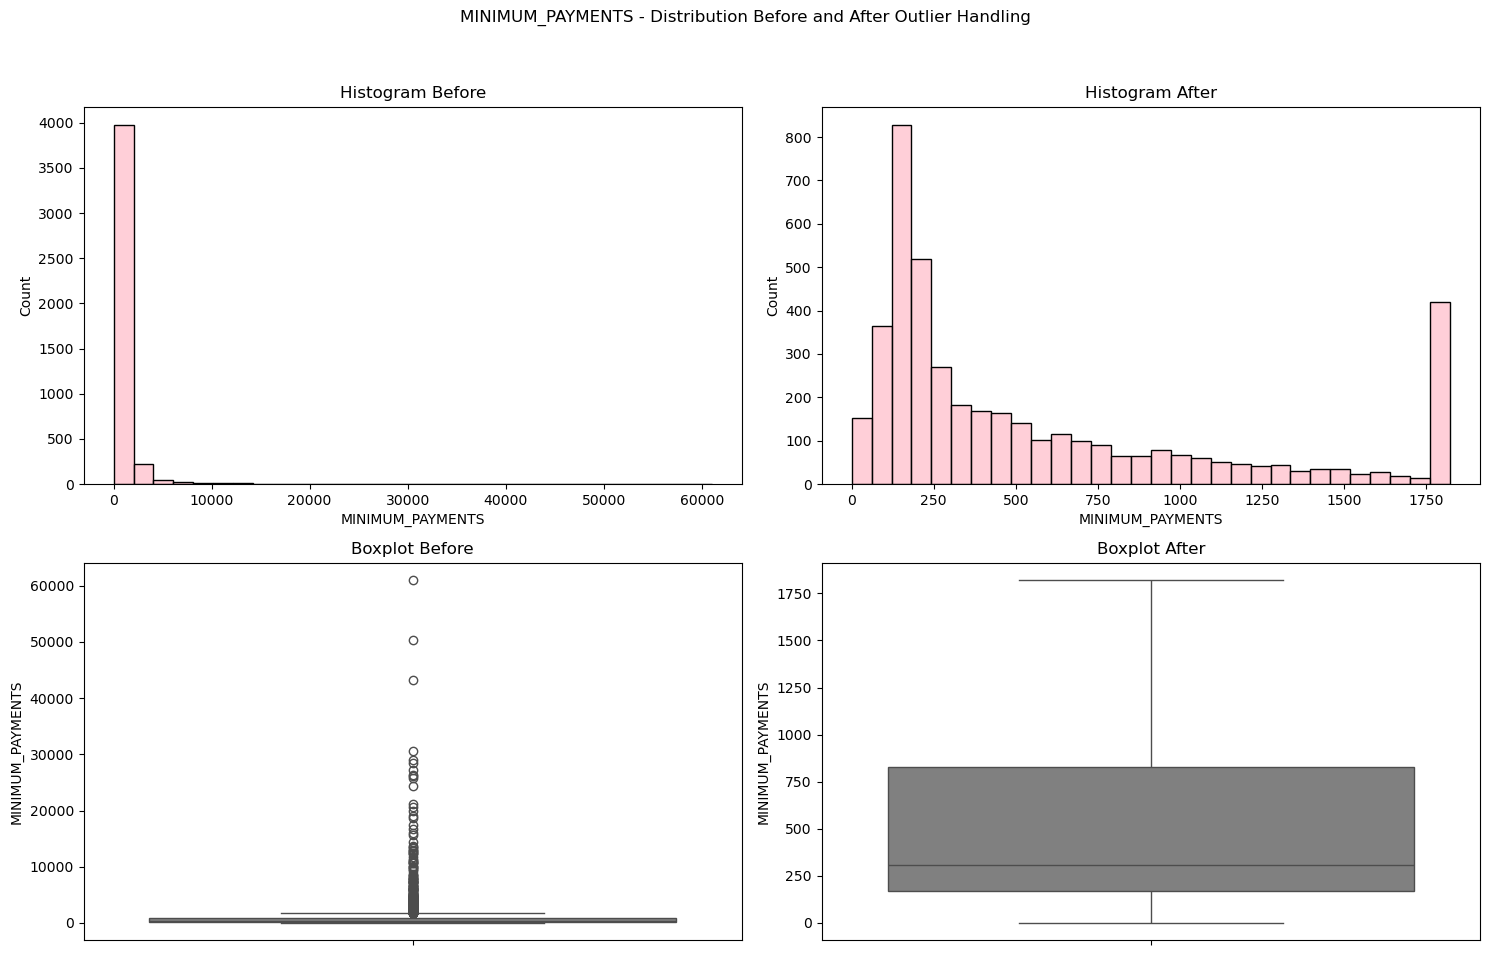

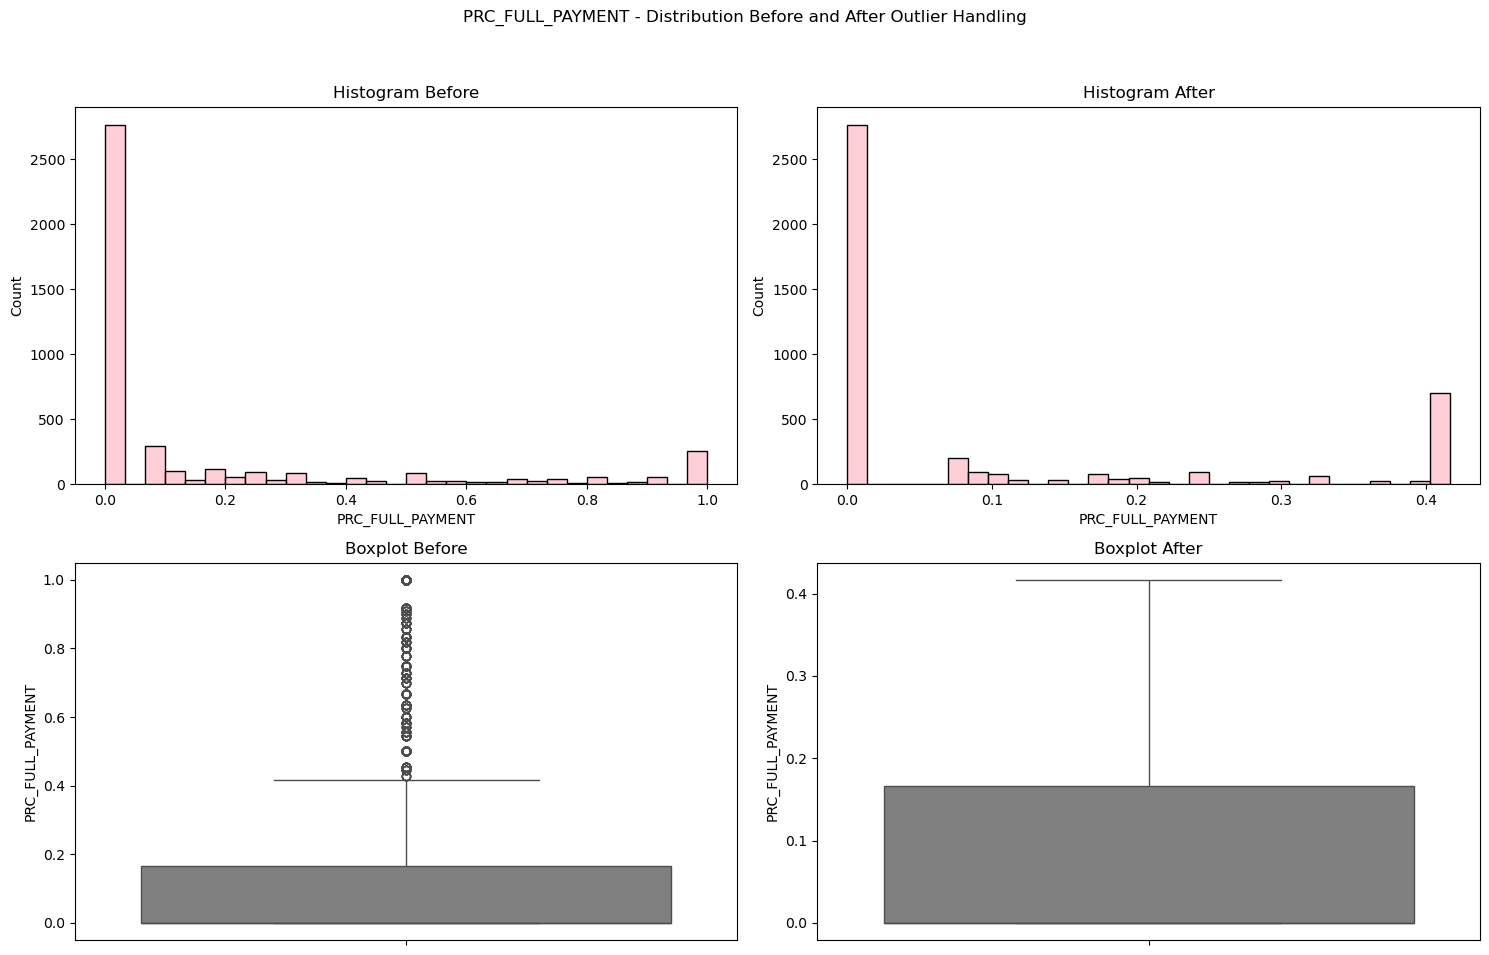

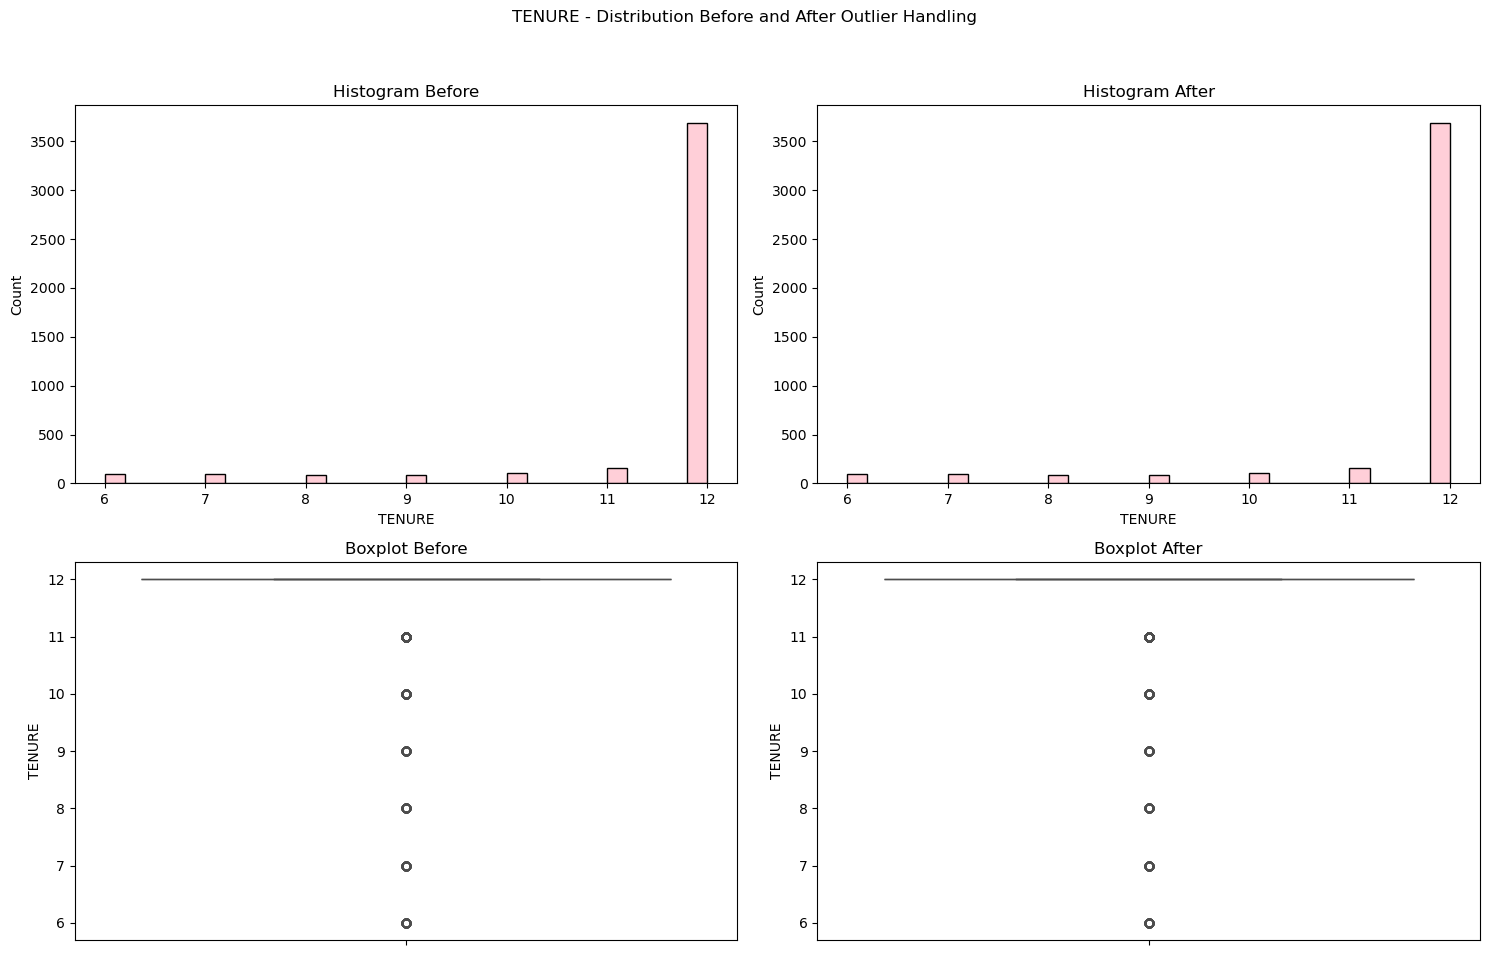

In [152]:
# Using Function
for col in df.columns:
    outlier_handling_plot_comparison(df, df_capped, col)

Berhasil melakukan capping, selanjutnya data akan discaling

## **- Scaling**

Scaling dilakukan menggunakan MinMaxScaler karena value pada masing-masing kolom memiliki rentang nilai yang cukup besar.

In [296]:
# Feature scaling menggunakan MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_capped)

Berhasil melakukan scaling, selanjutnya akan melakukan Dimensionality Reduction menggunakan PCA.

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Dimensionality Reduction**</p>

In [297]:
# Dimensionality reduction
pca = PCA()
pca.fit(df_scaled)

PCA()

Berhasil mendefinisikan PCA.

Text(0, 0.5, 'Eigenvalues')

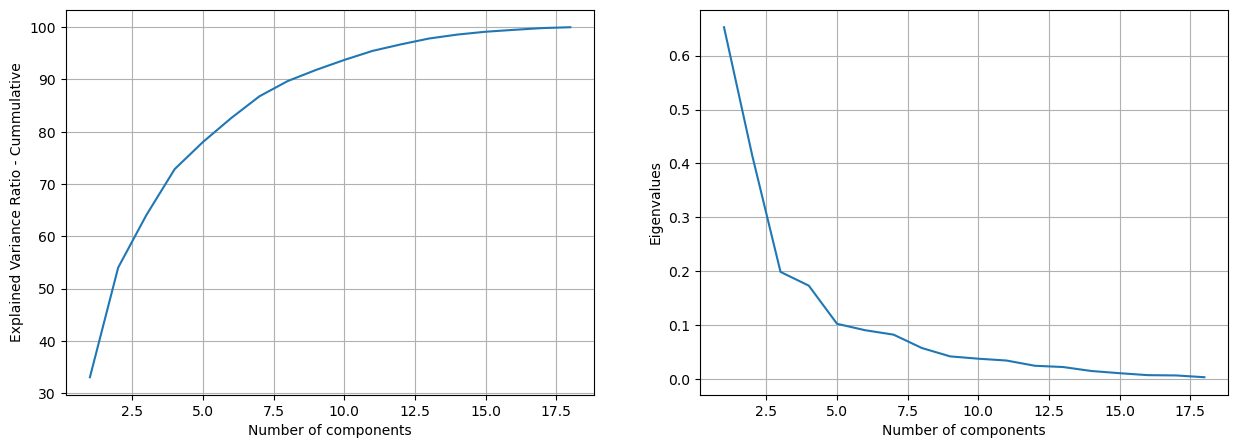

In [298]:
# Plot of the explained variance ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 19), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 19), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [300]:
# Train a model with 95% of the original dataset information
pca = PCA(n_components=0.95)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)

Berhasil melakukan train model dengan menyimpan 95% informasi original dataset

---
# Find the Optimal Number of Clusters

### Elbow Method

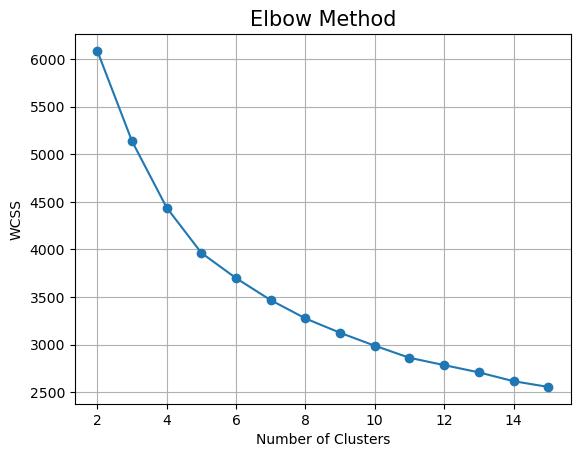

In [301]:
# Finding the optimal number of clusters using Elbow Method
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 15)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Dari visualisasi Elbow Method diatas dapat dilihat bahwa number of cluster yang dipilih adalah 5.

### Shilhouette

In [302]:
# Function to make a Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):

    # Looping for each n_cluster in range_n_cluster
    for n_clusters in range_n_clusters:
        # Create subplots with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The first subplot is Silhouette plot
        # Set of silhouette coefficients
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Cluster initialization with n_clusters value and random seed generator of 10 for reproducibility
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # Silhouette_score gives the average value for all samples
        # Display the density and separation of clusters formed
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Calculate the silhouette score for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Combine silhouette scores for samples belonging to cluster i, and sort
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Labeling the silhouette plot with its cluster number in the center
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Calculate a new y_lower for the next plot, 10 for 0 samples
            y_lower = y_upper + 10 

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # Vertical line for average silhouette score of all values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Second Plot, showing the actual cluster
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling cluster
        centers = clusterer.cluster_centers_

        # Create white circles on cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.23937941797752393
For n_clusters = 3 The average silhouette_score is : 0.1992002691040109
For n_clusters = 4 The average silhouette_score is : 0.20781433384475892
For n_clusters = 5 The average silhouette_score is : 0.21354458184205147
For n_clusters = 6 The average silhouette_score is : 0.2118618599674219
For n_clusters = 7 The average silhouette_score is : 0.21589776991468573
For n_clusters = 8 The average silhouette_score is : 0.21057074895987266
For n_clusters = 9 The average silhouette_score is : 0.2041451684923772
For n_clusters = 10 The average silhouette_score is : 0.20521608009021308
For n_clusters = 11 The average silhouette_score is : 0.2058673221390273
For n_clusters = 12 The average silhouette_score is : 0.2017722337313437
For n_clusters = 13 The average silhouette_score is : 0.20297170723478383
For n_clusters = 14 The average silhouette_score is : 0.19940291506502358


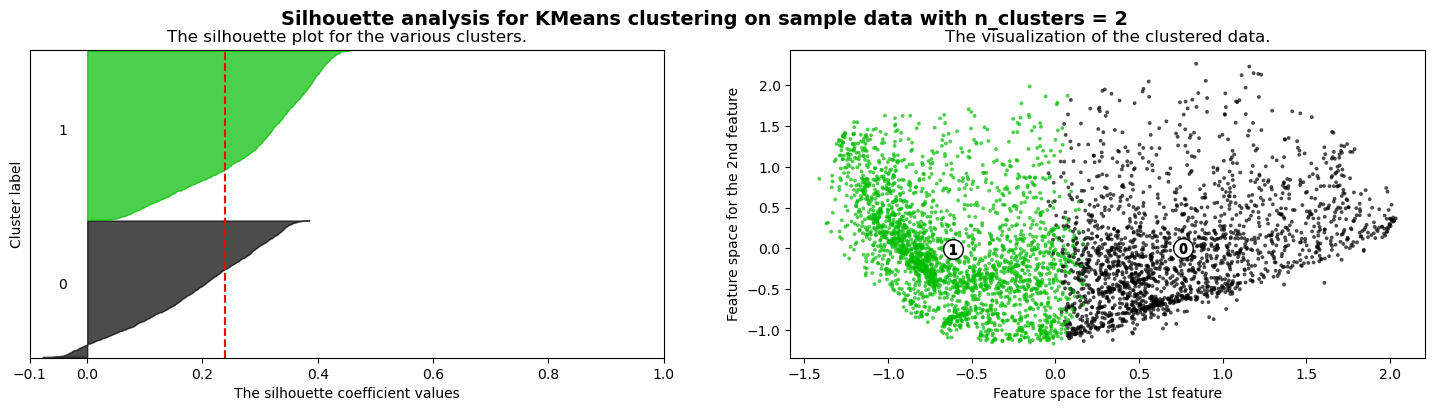

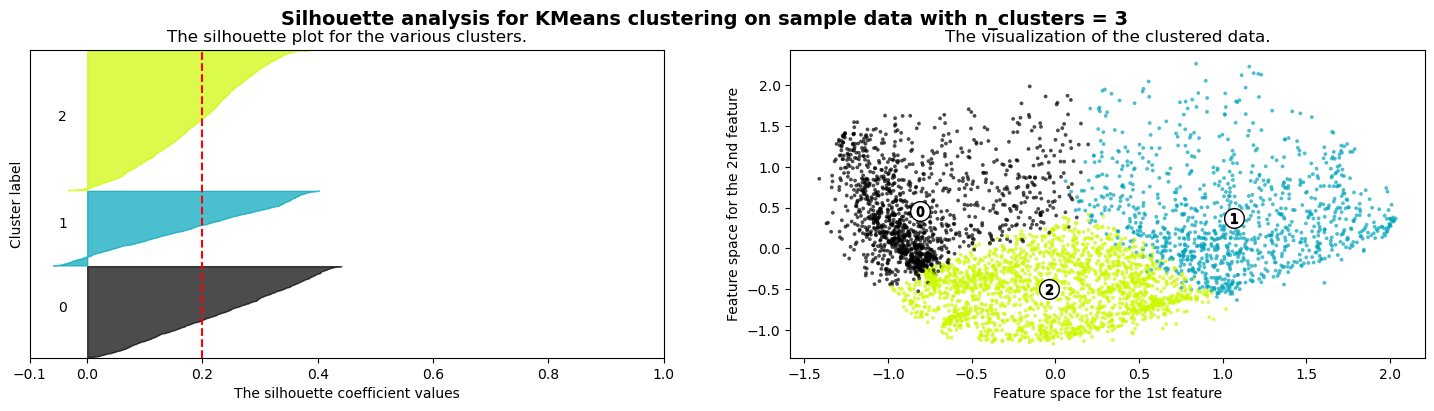

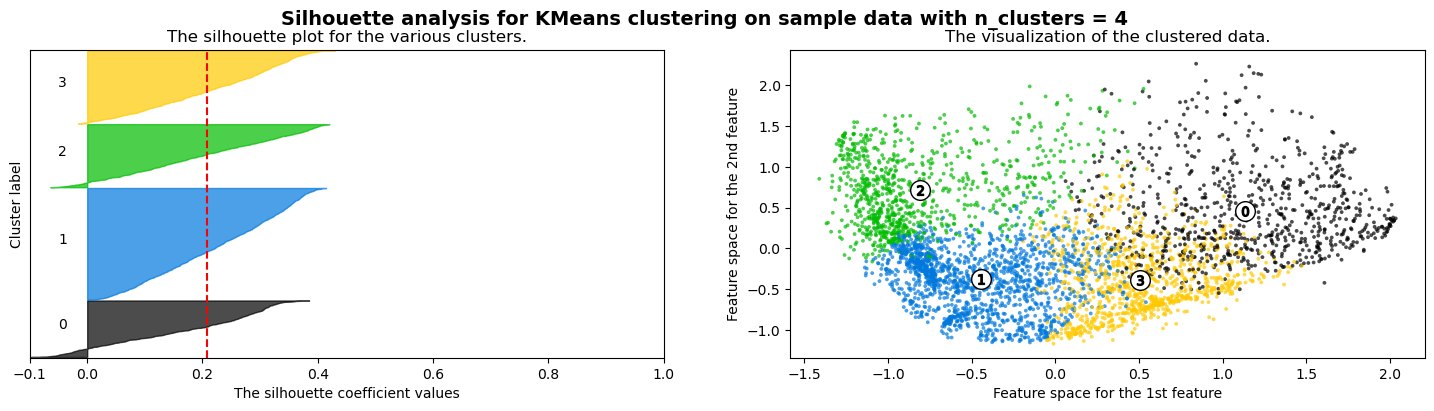

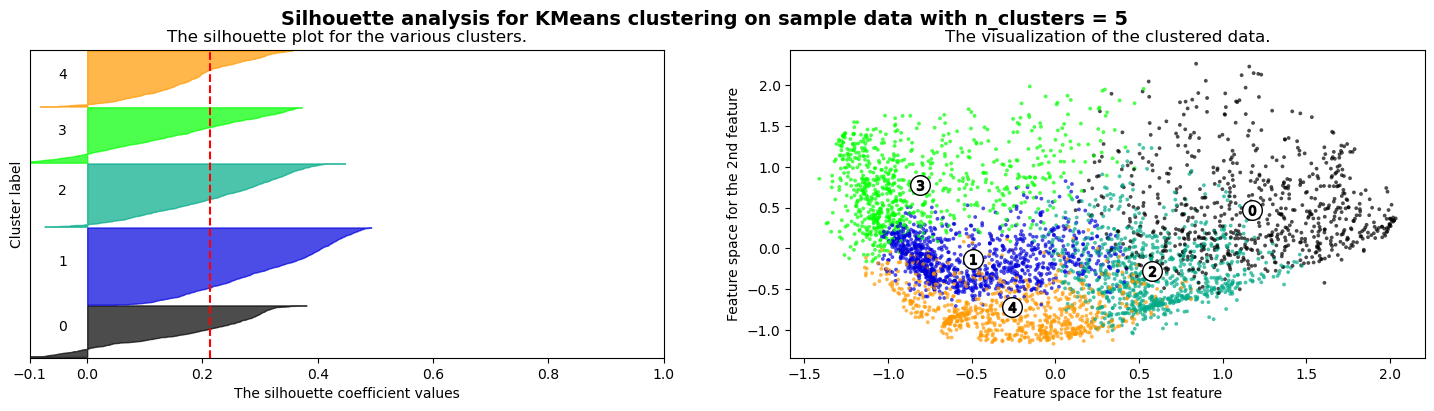

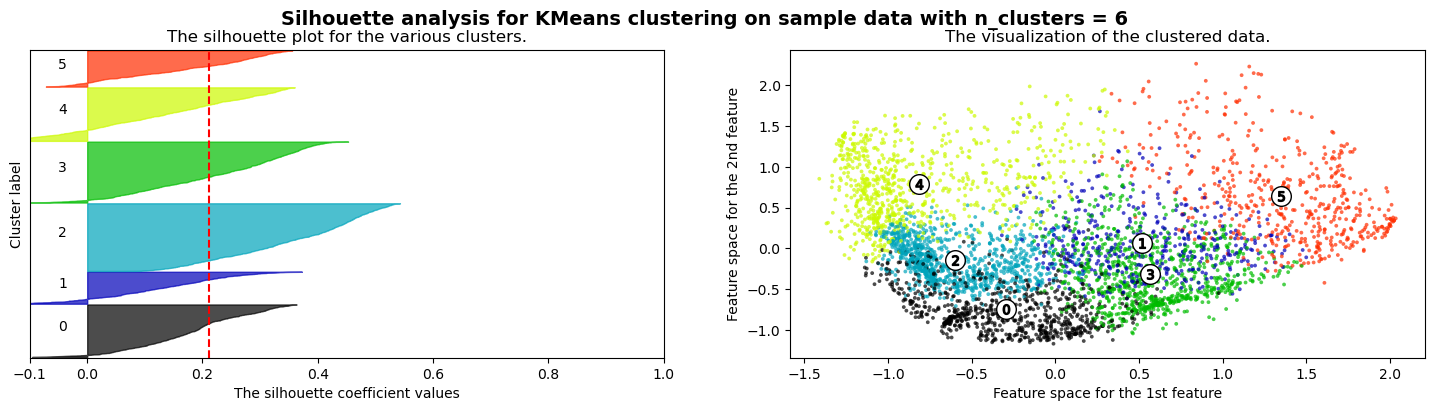

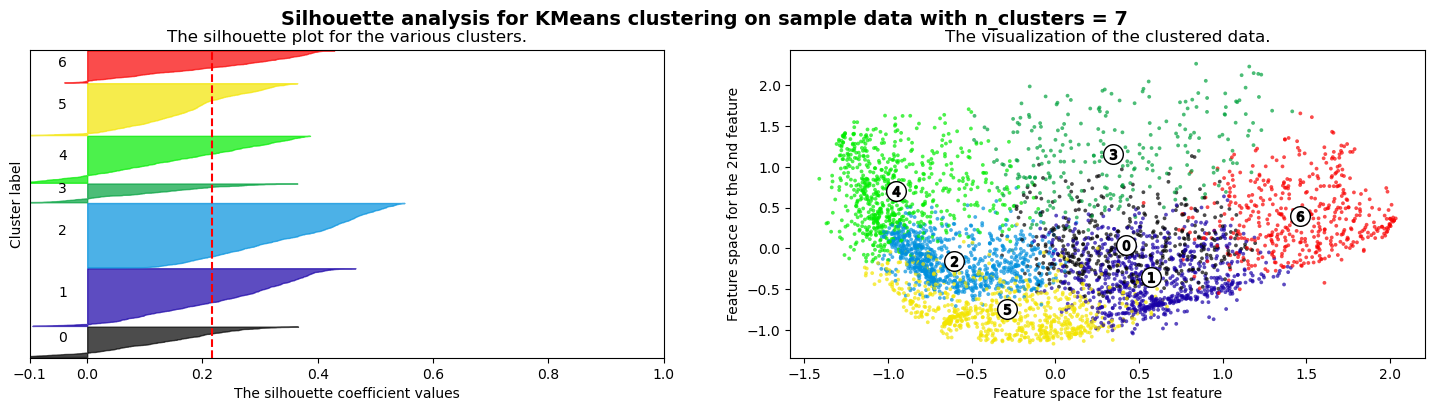

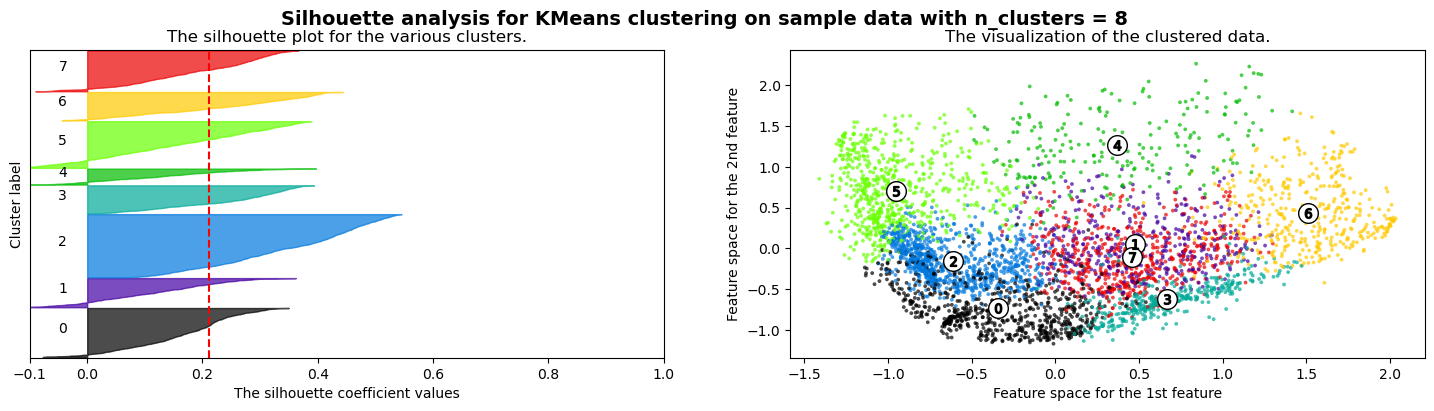

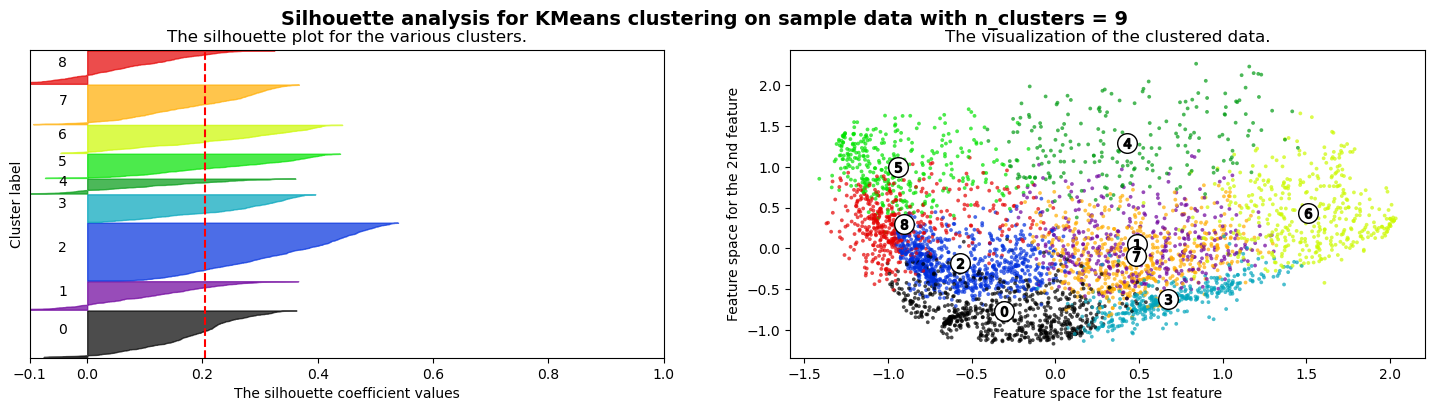

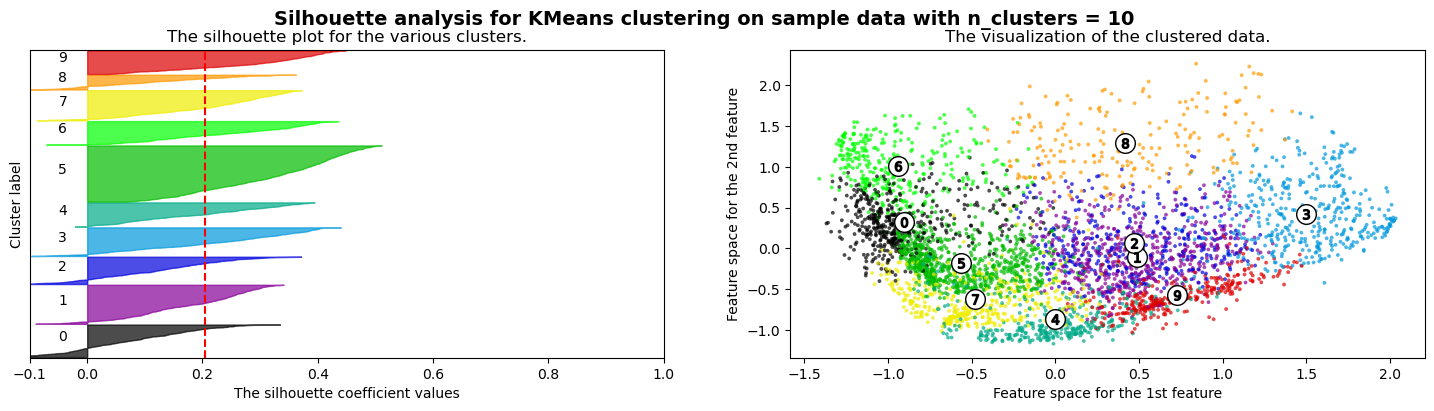

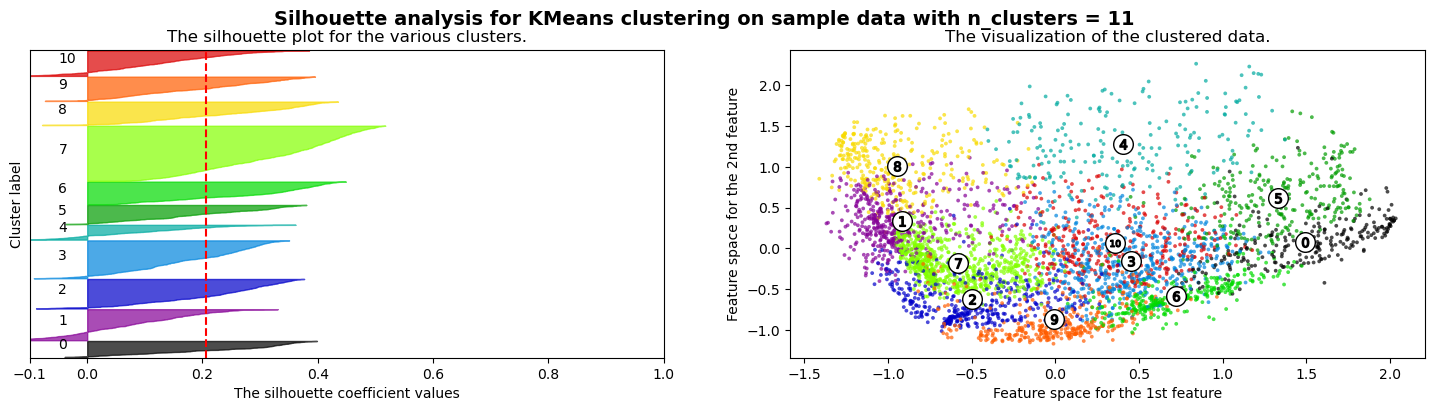

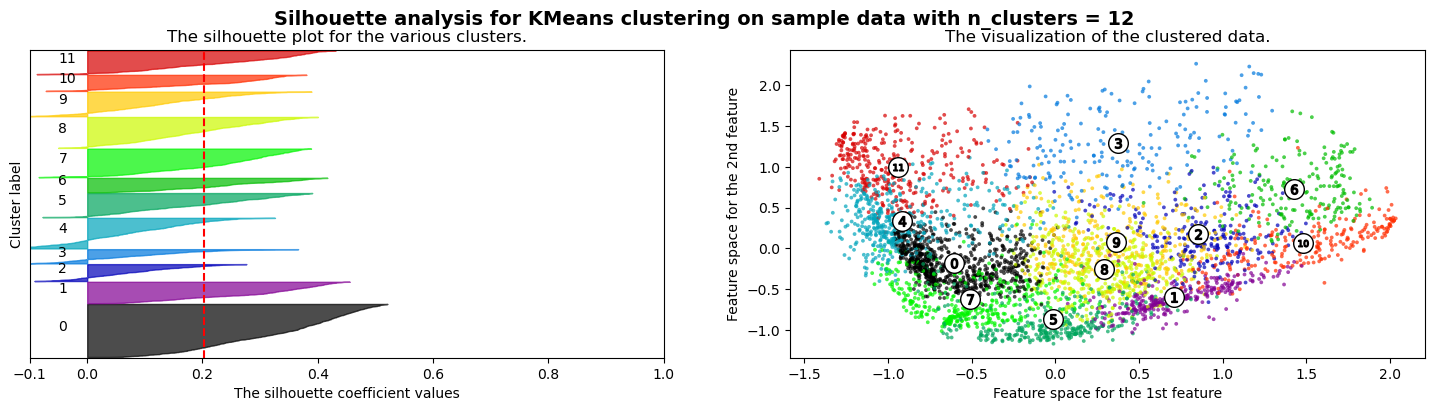

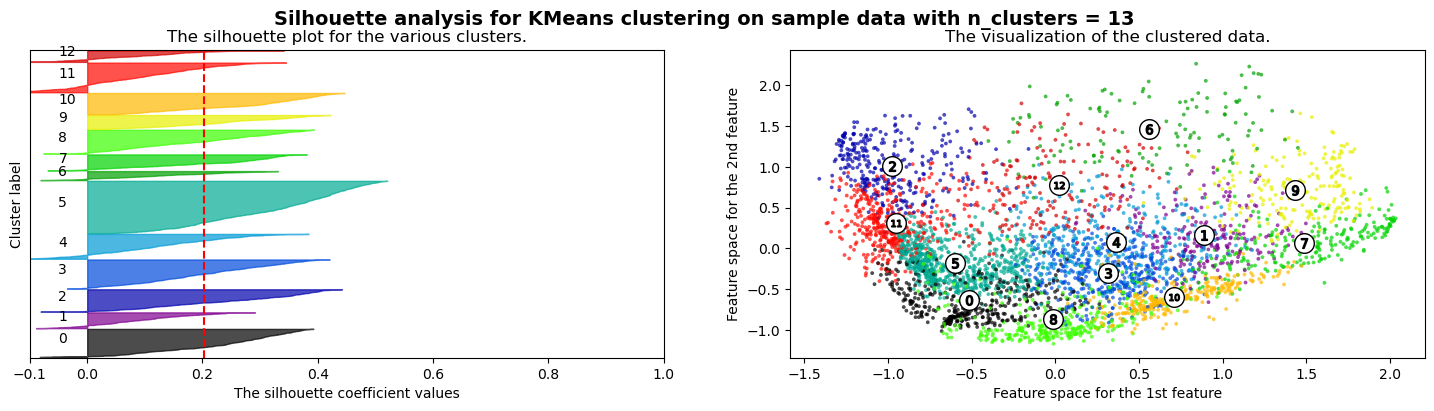

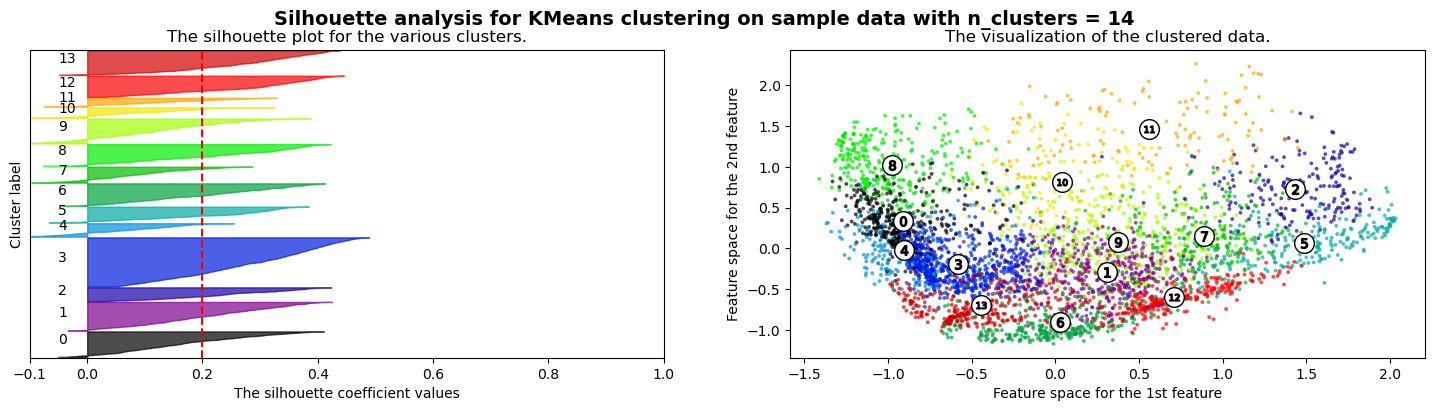

In [303]:
# Display Silhouette Score and Silhouette Plot
plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

Berdasarkan hasil Silhouette Plot sebaran cluster, terlihat n_clusters = 3 memberikan visualisasi yang baik.   
Maka jumlah cluster optimal yang digunakan adalah 3.

In [360]:
# Train the optimal number of clusters
km_best = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km_best.fit_predict(df_scaled_pca)
pred

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [361]:
# Adding the clustering result to the initial dataset
df['CLUSTER'] = pred
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        1902   943.584041           0.875000     103.00            103.00   
1        3426   461.455720           1.000000     585.00            585.00   
2        3976  1053.594730           1.000000    1450.00           1450.00   
3        4266  2237.238086           1.000000     120.00            120.00   
4        4680   424.994385           0.375000    1200.00           1200.00   
...       ...          ...                ...        ...               ...   
4311     4630  1079.008102           1.000000       0.00              0.00   
4312     8614   809.582978           0.909091       0.00              0.00   
4313     4296  3386.490883           1.000000     560.98            427.22   
4314     4476  4840.545574           1.000000    1595.93           1595.93   
4315     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4311                    0.00   1259.571764             0.000000   
4312                    0.00   3819.672466             0.000000   
4313                  133.76   2008.153534             1.000000   
4314                    0.00   4359.325750             0.454545   
4315                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                          0.000000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4311                    0.000000                          0.000000   
4312                    0.000000                          0.000000   
4313                    0.727273                          0.363636   
4314                    0.454545                          0.000000   
4315                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1        1000.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        2500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4311                0.545455                 9              0        1200.0   
4312                0.545455                 7              0        4150.0   
4313                0.545455                 9             20       10100.0   
4314                0.545455                17             25        6000.0   
4315                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0      215.325023        410.484825          0.000000       8        2  
1      258.032630        151.696433          0.000000       8        2  
2      397.090516        227.143184          0.000000       8        2  
3      343.102984        712.986387          0.000000       8        2  
4       57.266292         56.720210          0.000000       8        2  
...           ...               ... 

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Second EDA (after Clustering)**</p>

In [362]:
# Define the data
df_kmeans = df.copy()
df_kmeans.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     1902   943.584041              0.875      103.0             103.0   
1     3426   461.455720              1.000      585.0             585.0   
2     3976  1053.594730              1.000     1450.0            1450.0   
3     4266  2237.238086              1.000      120.0             120.0   
4     4680   424.994385              0.375     1200.0            1200.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1        1000.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        2500.0   
4                     0.0                 0              1        1200.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0  215.325023        410.484825               0.0       8        2  
1  258.032630        151.696433               0.0       8        2  
2  397.090516        227.143184               0.0       8        2  
3  343.102984        712.986387               0.0       8        2  
4   57.266292         56.720210               0.0       8        2

In [363]:
# Check the data size of each cluster
cluster_sizes = df_kmeans['CLUSTER'].value_counts()
cluster_sizes

CLUSTER
2    1975
0    1286
1    1055
Name: count, dtype: int64

Cluster 0 terdapat 1286 data, Cluster 1 1055 data, dan Cluster 2 1975 data

<Axes: >

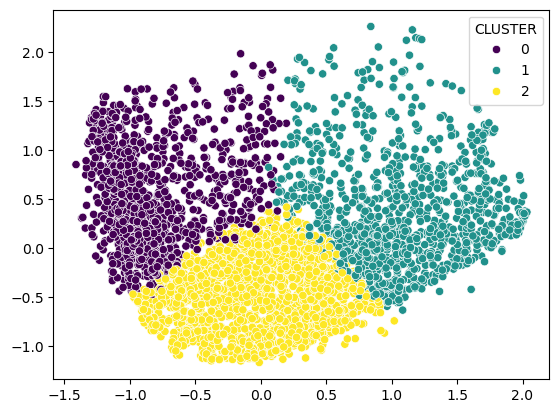

In [364]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)

df_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df_kmeans['CLUSTER'], palette='viridis')

Dilihat dari scatter plot 2d dapat dilihat bahwa hanya terdapat sedikit kebocoran pada sebaran data setiap cluster nya.

In [ ]:
check_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

for column in check_columns:
    # Print the average of the column in each cluster
    print(df_kmeans.groupby('CLUSTER')[column].mean().sort_values())
    
    # Visualize the average of the column in each cluster
    df_kmeans.groupby('CLUSTER')[column].mean().sort_values().plot.barh()
    plt.title(f'Average {column} per Cluster')
    plt.xlabel(f'Average {column}')
    plt.ylabel('Cluster')
    plt.show()

In [372]:
# View the average value of each feature for each cluster
cluster_profiles = df_kmeans.groupby('CLUSTER').mean()
cluster_profiles

CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
CLUSTER                                                             
0        4446.059098  2891.568048           0.948189   209.278227   
1        4411.736493  2005.794234           0.980519  3107.560417   
2        4526.848608   542.493571           0.815200   444.291033   

         ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
CLUSTER                                                           
0              151.081229               58.249059   2630.639421   
1             1865.833498             1241.818161    610.032214   
2              217.812866              227.237509    118.087208   

         PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
CLUSTER                                                    
0                   0.144524                    0.067045   
1                   0.916565                    0.526827   
2                   0.499494                    0.123893   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
CLUSTER                                                             
0                                0.077030                0.341392   
1                                0.723716                0.081203   
2                                0.371391                0.032048   

         CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
CLUSTER                                                               
0                8.538880       2.580871   4946.695179  2150.045518   
1                1.983886      42.042654   6649.840586  3204.094388   
2                0.488101       8.208101   3114.133896   791.008426   

         MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
CLUSTER                                                 
0             1303.133233          0.036062  11.364697  
1             1058.709597          0.239777  11.853081  
2              453.564524          0.204635  11.468354

#### Dari hasil Exploratory Data Analysist setelah dilakukan Clustering diperoleh :

**Cluster 0** (Pengguna Cash Advance dengan Saldo Tinggi):

BALANCE : Saldo rata-rata cukup tinggi (sekitar 2891.57), menandakan bahwa kelompok ini cenderung memiliki utang kartu kredit yang lebih tinggi.  
PURCHASES : Pembelian rata-rata sangat rendah (sekitar 209.28), yang menunjukkan aktivitas belanja yang rendah.  
CASH_ADVANCE: Penarikan tunai sangat tinggi (sekitar 2630.64), menunjukkan bahwa cluster ini sering menggunakan cash advance.  
CREDIT_LIMIT : Limit kredit relatif tinggi (sekitar 4946.70), sesuai dengan tingginya saldo dan penggunaan cash advance.  
PAYMENTS: Pembayaran rata-rata (sekitar 2150.05) menunjukkan usaha pelunasan utang yang relatif baik.  
PRC_FULL_PAYMENT : Rendahnya persentase pembayaran penuh (sekitar 0.036) mengindikasikan bahwa cluster ini tidak sering melunasi pembayaran penuhnya.  
TENURE : Durasi rata-rata hampir maksimal (sekitar 11.36 bulan), menunjukkan pelanggan jangka panjang.  
  
  
**Cluster 1** (Pembeli Aktif dengan Penggunaan Cash Advance Rendah):

BALANCE : Saldo rata-rata (sekitar 2005.79) lebih rendah dibandingkan cluster 0, menunjukkan pengelolaan kredit yang lebih baik.  
PURCHASES : Pembelian sangat tinggi (sekitar 3107.56), menunjukkan kelompok ini paling aktif dalam menggunakan kartu kredit untuk pembelian.  
CASH_ADVANCE : Penggunaan cash advance rendah (sekitar 610.03), menunjukkan transaksi penarikan tunai yang rendah.  
CREDIT_LIMIT : Limit kredit tinggi (sekitar 6649.84), sesuai dengan aktivitas belanja yang tinggi.  
PAYMENTS: Pembayaran tinggi (sekitar 3204.09), sesuai dengan pembelian yang tinggi dan menunjukkan kemampuan pelunasan yang baik.  
PRC_FULL_PAYMENT : Persentase pembayaran penuh yang lebih tinggi (sekitar 0.239) menunjukkan kecenderungan untuk melunasi tagihan lebih sering.  
TENURE : Durasi rata-rata juga hampir maksimal (sekitar 11.85 bulan), menunjukkan loyalitas pelanggan.  
  
  
**Cluster 2** (Penggunaan Kartu Kredit Moderat dengan Saldo Rendah):

BALANCE : Saldo rata-rata paling rendah (sekitar 542.49), menunjukkan manajemen hutang yang baik atau pemakaian kartu kredit yang lebih jarang.  
PURCHASES : Pembelian moderat (sekitar 444.29), mengindikasikan penggunaan kartu kredit yang teratur tetapi tidak seintens cluster lain.  
CASH_ADVANCE : Penarikan tunai rata-rata rendah (sekitar 118.09).  
CREDIT_LIMIT : Limit kredit lebih rendah (sekitar 3114.13) dibandingkan dengan dua cluster lain.  
PAYMENTS : Pembayaran rata-rata yang rendah (sekitar 791.00), sesuai dengan aktivitas kartu kredit yang lebih rendah.  
PRC_FULL_PAYMENT : Persentase pembayaran penuh yang relatif tinggi (sekitar 0.204), menunjukkan kebiasaan pelunasan yang baik.  
TENURE : Durasi rata-rata sedikit lebih rendah (sekitar 11.47 bulan) tapi tetap menunjukkan komitmen jangka panjang.  

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Model Saving**</p>

In [253]:
# Menyimpan model
with open('kmeans_model.pkl', 'wb') as file_1:
    pickle.dump(km_best, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

Berhasil menyimpan model

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Model Inference**</p>

In [ ]:
# Load models and other saved files
with open("kmeans_model.pkl", "rb") as file_1:
  km_best = pickle.load(file_1)

with open("scaler.pkl", "rb") as file_2:
  scaler = pickle.load(file_2)

In [ ]:
# Define the desired number of rows
num_rows = 15

# Create random data for each column
rand_data = {
    'CUST_ID': [i for i in range(4317, 4317 + num_rows)],
    'BALANCE': np.random.uniform(0, 10000, num_rows),
    'BALANCE_FREQUENCY': np.random.uniform(0, 1, num_rows),
    'PURCHASES': np.random.uniform(0, 5000, num_rows),
    'ONEOFF_PURCHASES': np.random.uniform(0, 3000, num_rows),
    'INSTALLMENTS_PURCHASES': np.random.uniform(0, 2000, num_rows),
    'CASH_ADVANCE': np.random.uniform(0, 5000, num_rows),
    'PURCHASES_FREQUENCY': np.random.uniform(0, 1, num_rows),
    'ONEOFF_PURCHASES_FREQUENCY': np.random.uniform(0, 1, num_rows),
    'PURCHASES_INSTALLMENTS_FREQUENCY': np.random.uniform(0, 1, num_rows),
    'CASH_ADVANCE_FREQUENCY': np.random.uniform(0, 1, num_rows),
    'CASH_ADVANCE_TRX': np.random.randint(0, 100, num_rows),
    'PURCHASES_TRX': np.random.randint(0, 100, num_rows),
    'CREDIT_LIMIT': np.random.uniform(0, 20000, num_rows),
    'PAYMENTS': np.random.uniform(0, 10000, num_rows),
    'MINIMUM_PAYMENTS': np.random.uniform(0, 5000, num_rows),
    'PRC_FULL_PAYMENT': np.random.uniform(0, 1, num_rows),
    'TENURE': np.random.randint(1, 12, num_rows)
}

# Create Data Frame from data
df_inf = pd.DataFrame(rand_data)
df_inf

In [ ]:
# Scaling feature inference
df_inf_scaled = scaler.transform(df_inf)

In [ ]:
# Predicts
km_best.fit(df_inf_scaled)
predicted_clusters = km_best.predict(df_inf_scaled)

# Convert predicted_clusters Into Data Frame
predicted_clusters = pd.DataFrame(predicted_clusters, columns=['CLUSTER'])

In [ ]:
# Combine Data Frame df_inf_scaled and predicted_clusters_df
prediction = pd.concat([df_inf, predicted_clusters], axis=1)

# Display prediction results
prediction

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Conclusion**</p>

- Banyak kluster yang optimal yang dipilih pada modek K-Means ini adalah 3, karena dilihat dari visualisasi sebaran datanya kebocoran klusternya sedikit walaupun memiliki silhouette score yang relatif rendah.

- Kelebihan dan Kelemahan model  
Kelebihan dari model ini adalah interpretasi yang sederhana, hasil clustering yang mudah diinterpretasikan sehingga dapat dengan mudah mengetahui karakteristik atau pola yang ditemukan dalam setiap klaster.  
Kelemahan dari model ini adalah nilai dari silhouette score untuk n_cluster yang dipilih tergolong cukup rendah.

- Untuk improvement model yang bisa dilakukan adalah melakukan analisis yang lebih mendalam lagi dalam memilih n_cluster.  

- Bisnis insight yang bisa dilakukan terhadap setiap cluster (segmentasi pelanggan), yaitu untuk Cluster 0 mungkin memerlukan strategi untuk mengurangi hutang kartu kredit yang tinggi, Cluster 1 bisa diberi reward atas aktivitas pembelian mereka, dan Cluster 2 bisa menjadi target penawaran untuk mendorong penggunaan kartu kredit lebih sering dengan manfaat tambahan.

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:#222021;font-size:130%;text-align:center;border-radius:10px 10px;margin-bottom:10px;">**Conceptual Problems**</p>

1. What is the definition of inertia in the K-Means algorithm?

2. Explain what is meant by Elbow Method (reasons for using, how to use, advantages/disadvantages, etc.)!

Answer:  
1. Inertia in the context of K-Means algorithm refers to the measure of how far the data points in a cluster are from its center (centroid).  

2. Elbow Method is a method used to determine the optimal number of clusters in a clustering algorithm. In the Elbow Method, increasing the number of clusters will increase the clustering of the data, but after a certain number, the increase will decrease significantly, which forms an elbow shape on the graph.

    Reason for Use: to determine the optimal number of clusters.

    How to Use:
    After clustering using the desired method, the inertia value will be calculated and then clustering for several numbers of clusters and calculate the inertia value for each trial. Then a plot is made for the inertia value using the elbow method. The optimal number of clusters generally lies at the point where the inertia value decreases significantly, forming an elbow on the graph. This indicates that the addition of further clusters gives an insignificant reduction in inertia, indicating the optimal number of clusters.

    Advantages:  
    - Simple and easy to understand  
    - Provides a rough estimate of the optimal number of clusters.   
    
    Disadvantage:   
    - Subjective, the determination of the “elbow” point can be subjective as it is not always obvious  
    - Depends on the data, does not always work well for all types of data or data distributions.  

    Usage Example:
    Suppose you have a dataset and want to cluster the data using K-Means algorithm. You can use the Elbow Method to select the optimal number of clusters with the steps described above.

    Conclusion:
    Elbow Method is a useful method to determine the optimal number of clusters in clustering algorithms such as K-Means. Although it is simple and sometimes requires subjective interpretation, it can provide a good initial view of the number of clusters that fit the data.